
-  **기본 계측시스템 요소의 전달함수**:
-  전달함수는 시스템이 입력에 어떻게 반응하는지를 수학적으로 표현한 함수입니다.
-  $G(s)$ 는 전달함수를 의미하며, 이는 입력 $X(s)$ 와 출력 $Y(s)$ 사이의 관계를 나타냅니다.
-  **기본 계측시스템 요소의 단위계단응답**:
-  시스템이 단위 계단 입력(즉, 입력이 0에서 1로 급격히 변화하는 신호)에 대해 어떻게 반응하는지 분석합니다.
-  위에서 $y(t)=\frac{K}{T}x(t)$ 로 표현되어 있으며, 여기서 $K$ 는 이득(gain), $T$ 는 시간 상수를 나타냅니다.
-  **계측시스템의 전달함수와 상태방정식**:
-  전달함수는 $G(s)=\frac{Y(s)}{X(s)}=K$ 로 정의되며, 이는 비례 시스템(단순 비례 관계)이란 의미입니다.
-  상태방정식으로도 시스템을 표현할 수 있으며, 이 경우 상태방정식은 시간에 따른 시스템의 동작을 나타냅니다.
-  **상태방정식의 표준형**:
-  시스템을 상태방정식으로 표기할 때 다양한 표준형이 있습니다. 이 경우 상태 공간(State Space) 방식으로도 표현될 수 있습니다.
-  **비례 요소**:
-  비례 요소는 입력과 출력이 단순 비례 관계에 있는 시스템을 나타냅니다. 그림에서 보이는 스프링 시스템이 그 예시로, 입력과 출력이 비례하는 단순한 모델입니다.


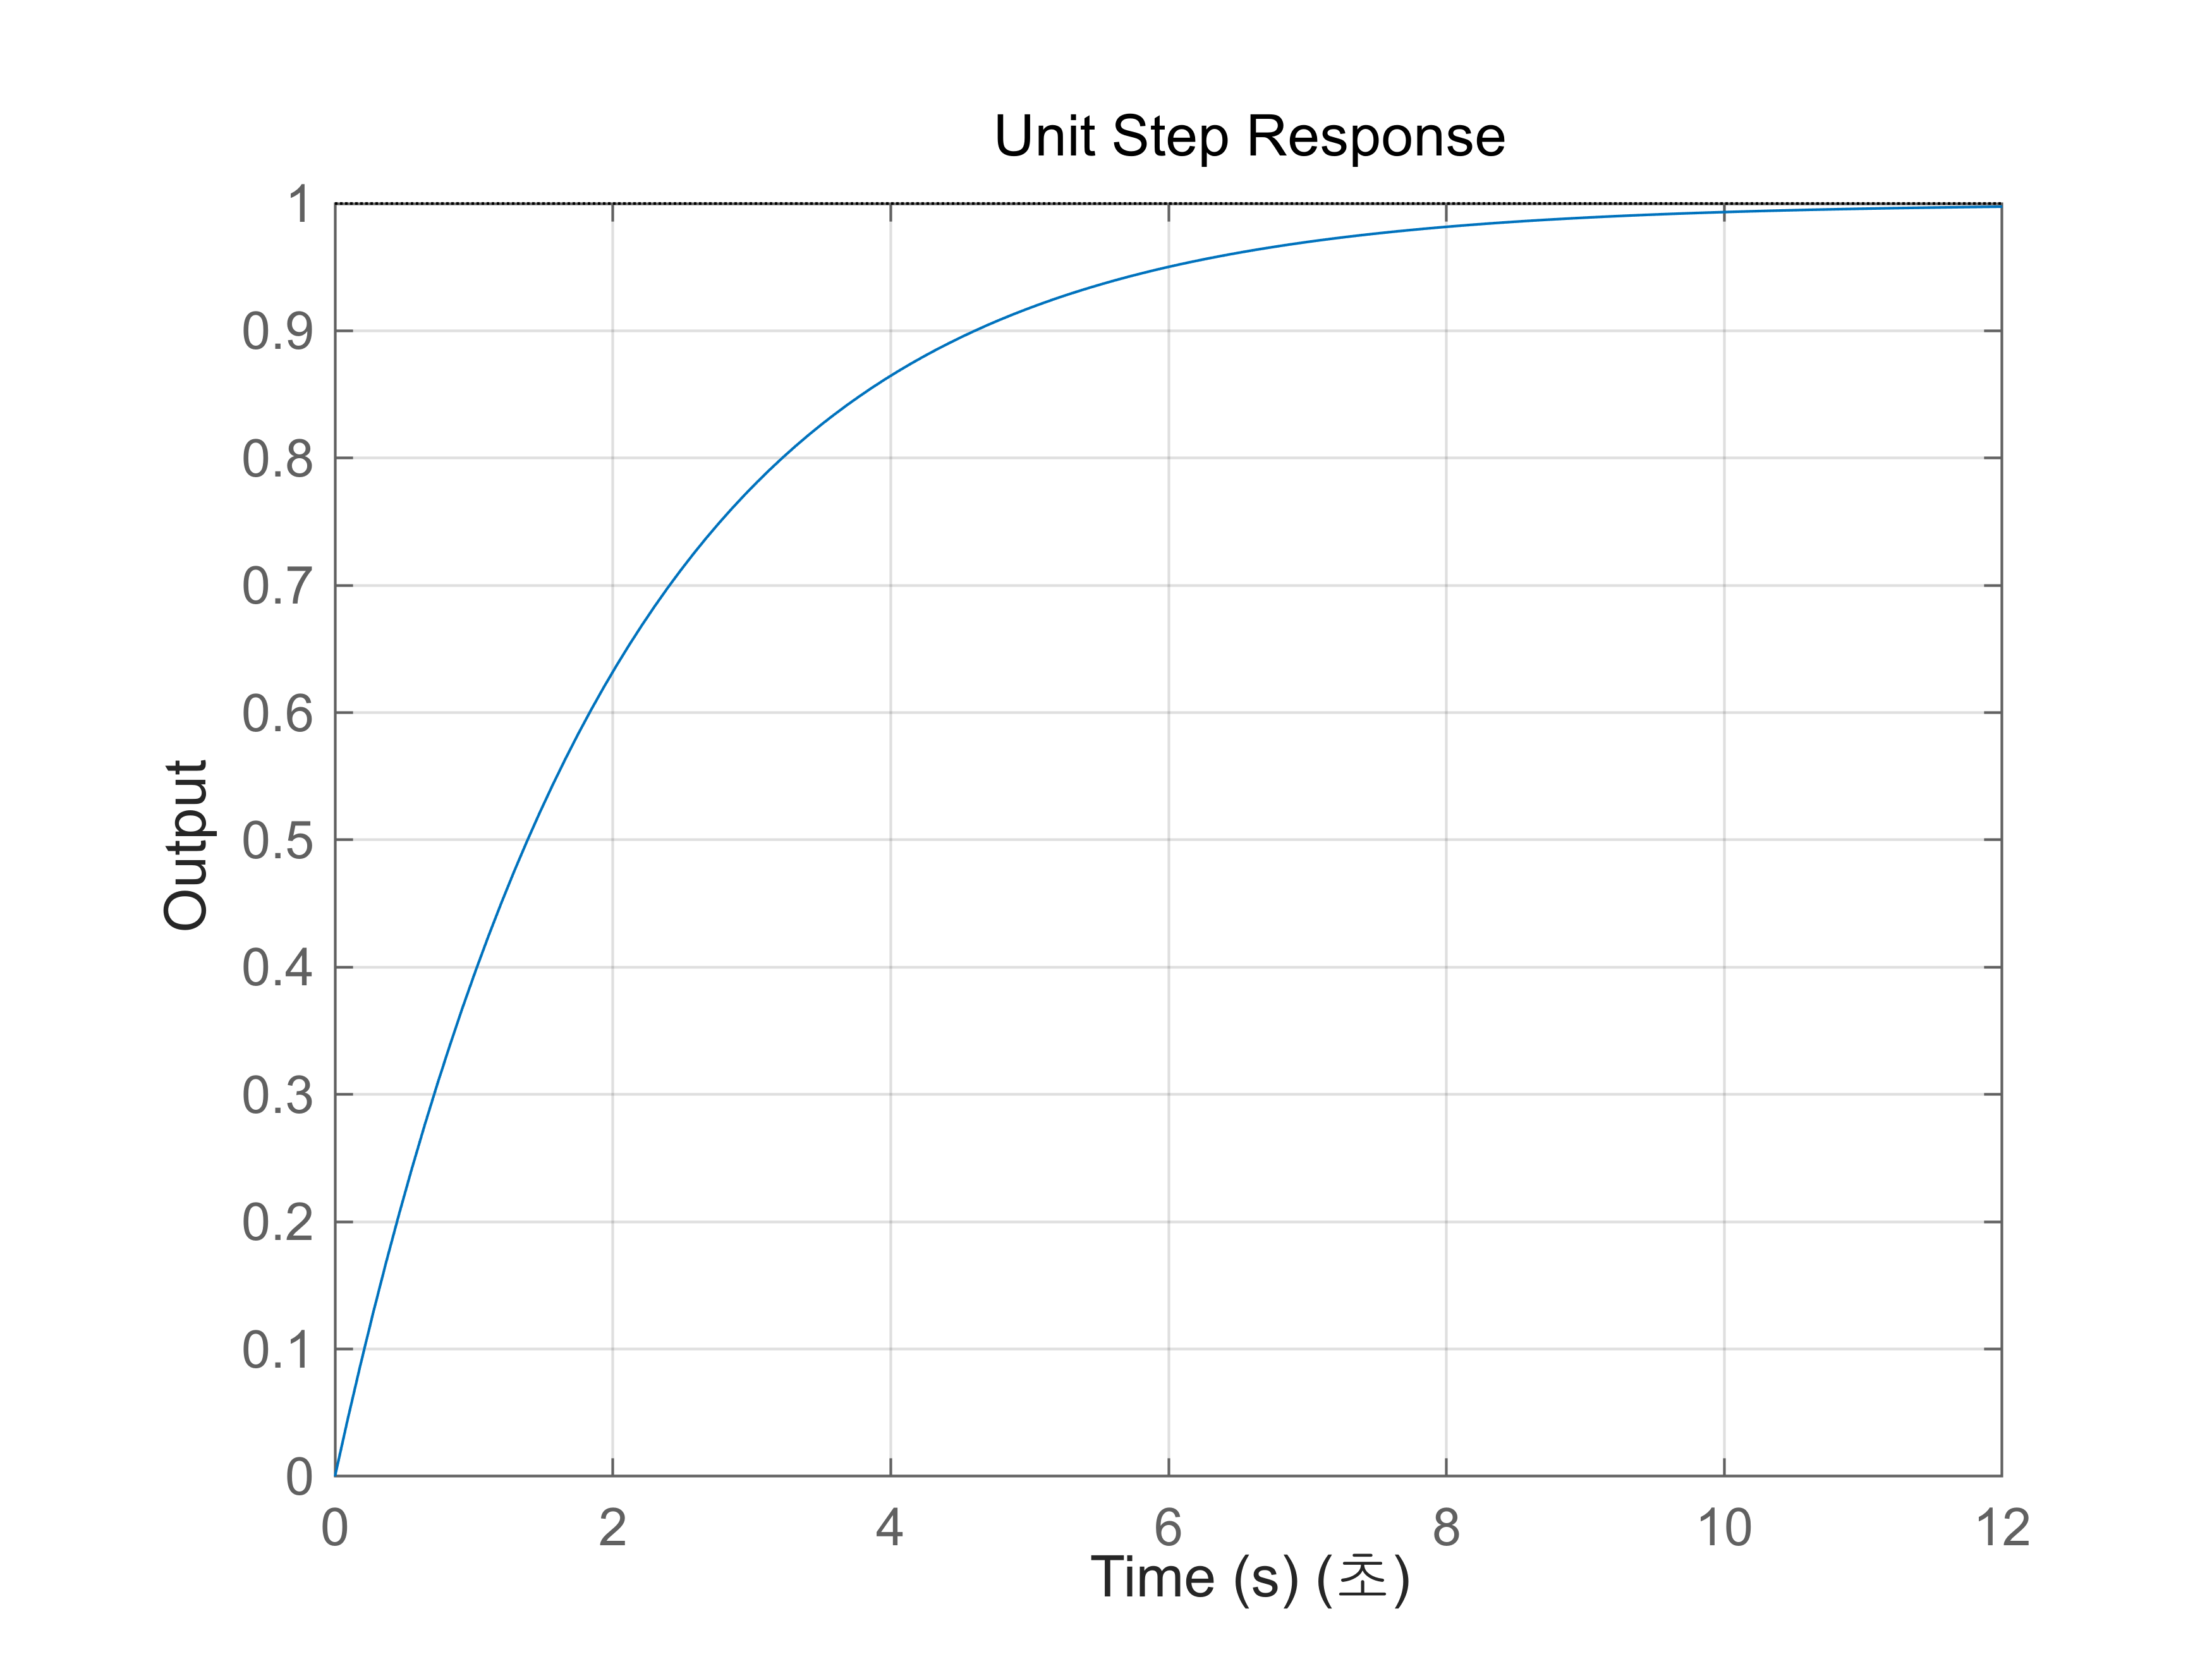

In [1]:
% 전달함수 파라미터 설정
K = 1;  % 이득 (gain)
T = 2;  % 시간 상수 (time constant)

% 전달함수 정의
s = tf('s');
G = K/(T*s + 1);

% 단위 계단 응답
figure;
step(G);
title('Unit Step Response');
xlabel('Time (s)');
ylabel('Output');
grid on;


**비례 요소의 예****:**

-  비례 요소는 입력과 출력이 비례하는 시스템을 의미합니다.
-  이미지에는 세 가지 비례 요소 예시가 있습니다:

1.  **변압기**: 입력 전류와 출력 전류 사이의 비례 관계를 나타냅니다.
2. **연산 증폭기(Operational Amplifier)**: 입력 전압과 출력 전압 사이의 비례 관계를 나타내는 회로.
3. **전동기**: 입력 전압과 출력 토크 사이의 비례 관계를 설명합니다.

-  각 시스템의 전달함수 $G(s)$ 는 비례 상수 $K$ 에 의해 정의됩니다. 예를 들어 $G(s)=\frac{V_0 (s)}{V_i (s)}=\frac{R_2 }{R_1 }$ ​​와 같은 관계가 도출됩니다.

 **2.** **미분 요소****:**

-  **미분 요소**는 입력의 미분에 비례하는 출력을 나타냅니다.
-  수학적으로는 $v(t)=K\frac{d}{dt}\theta (t)$ 로 표현되며, 전달함수로는 $G(s)=Ks$ 가 됩니다.
-  이미지에서는 **속도 계열 발전기**를 예로 들며, 각도 $\theta (t)$ 의 미분값이 속도 $v(t)$ 로 나타나는 시스템을 설명하고 있습니다.
-  또한 단위 계단 입력에 대한 미분 요소의 응답은 시간에 따라 일정한 출력을 생성하는 것을 보여줍니다. 이는 단위 계단 입력에 대해 출력이 충격 함수(Impulse) 형태로 나타나는 특성을 의미합니다.

-  \*\*비인과적 시스템(순수 미분기)\*\*는 <samp>step</samp> 함수로 시뮬레이션할 수 없습니다.
-  저역 통과 필터 또는 고차 시스템으로 비인과적 시스템을 근사하여 시뮬레이션할 수 있습니다.

**방법 1: 저역 통과 필터 추가**


미분 요소에 작은 필터를 추가하여 응답을 안정화할 수 있습니다. 예를 들어, 전달함수 $G(s)=\frac{s}{\tau s+1}$ 형태로 변경하여 저역 통과 필터로 근사할 수 있습니다. 여기서 τ\\tauτ는 매우 작은 시간 상수입니다.



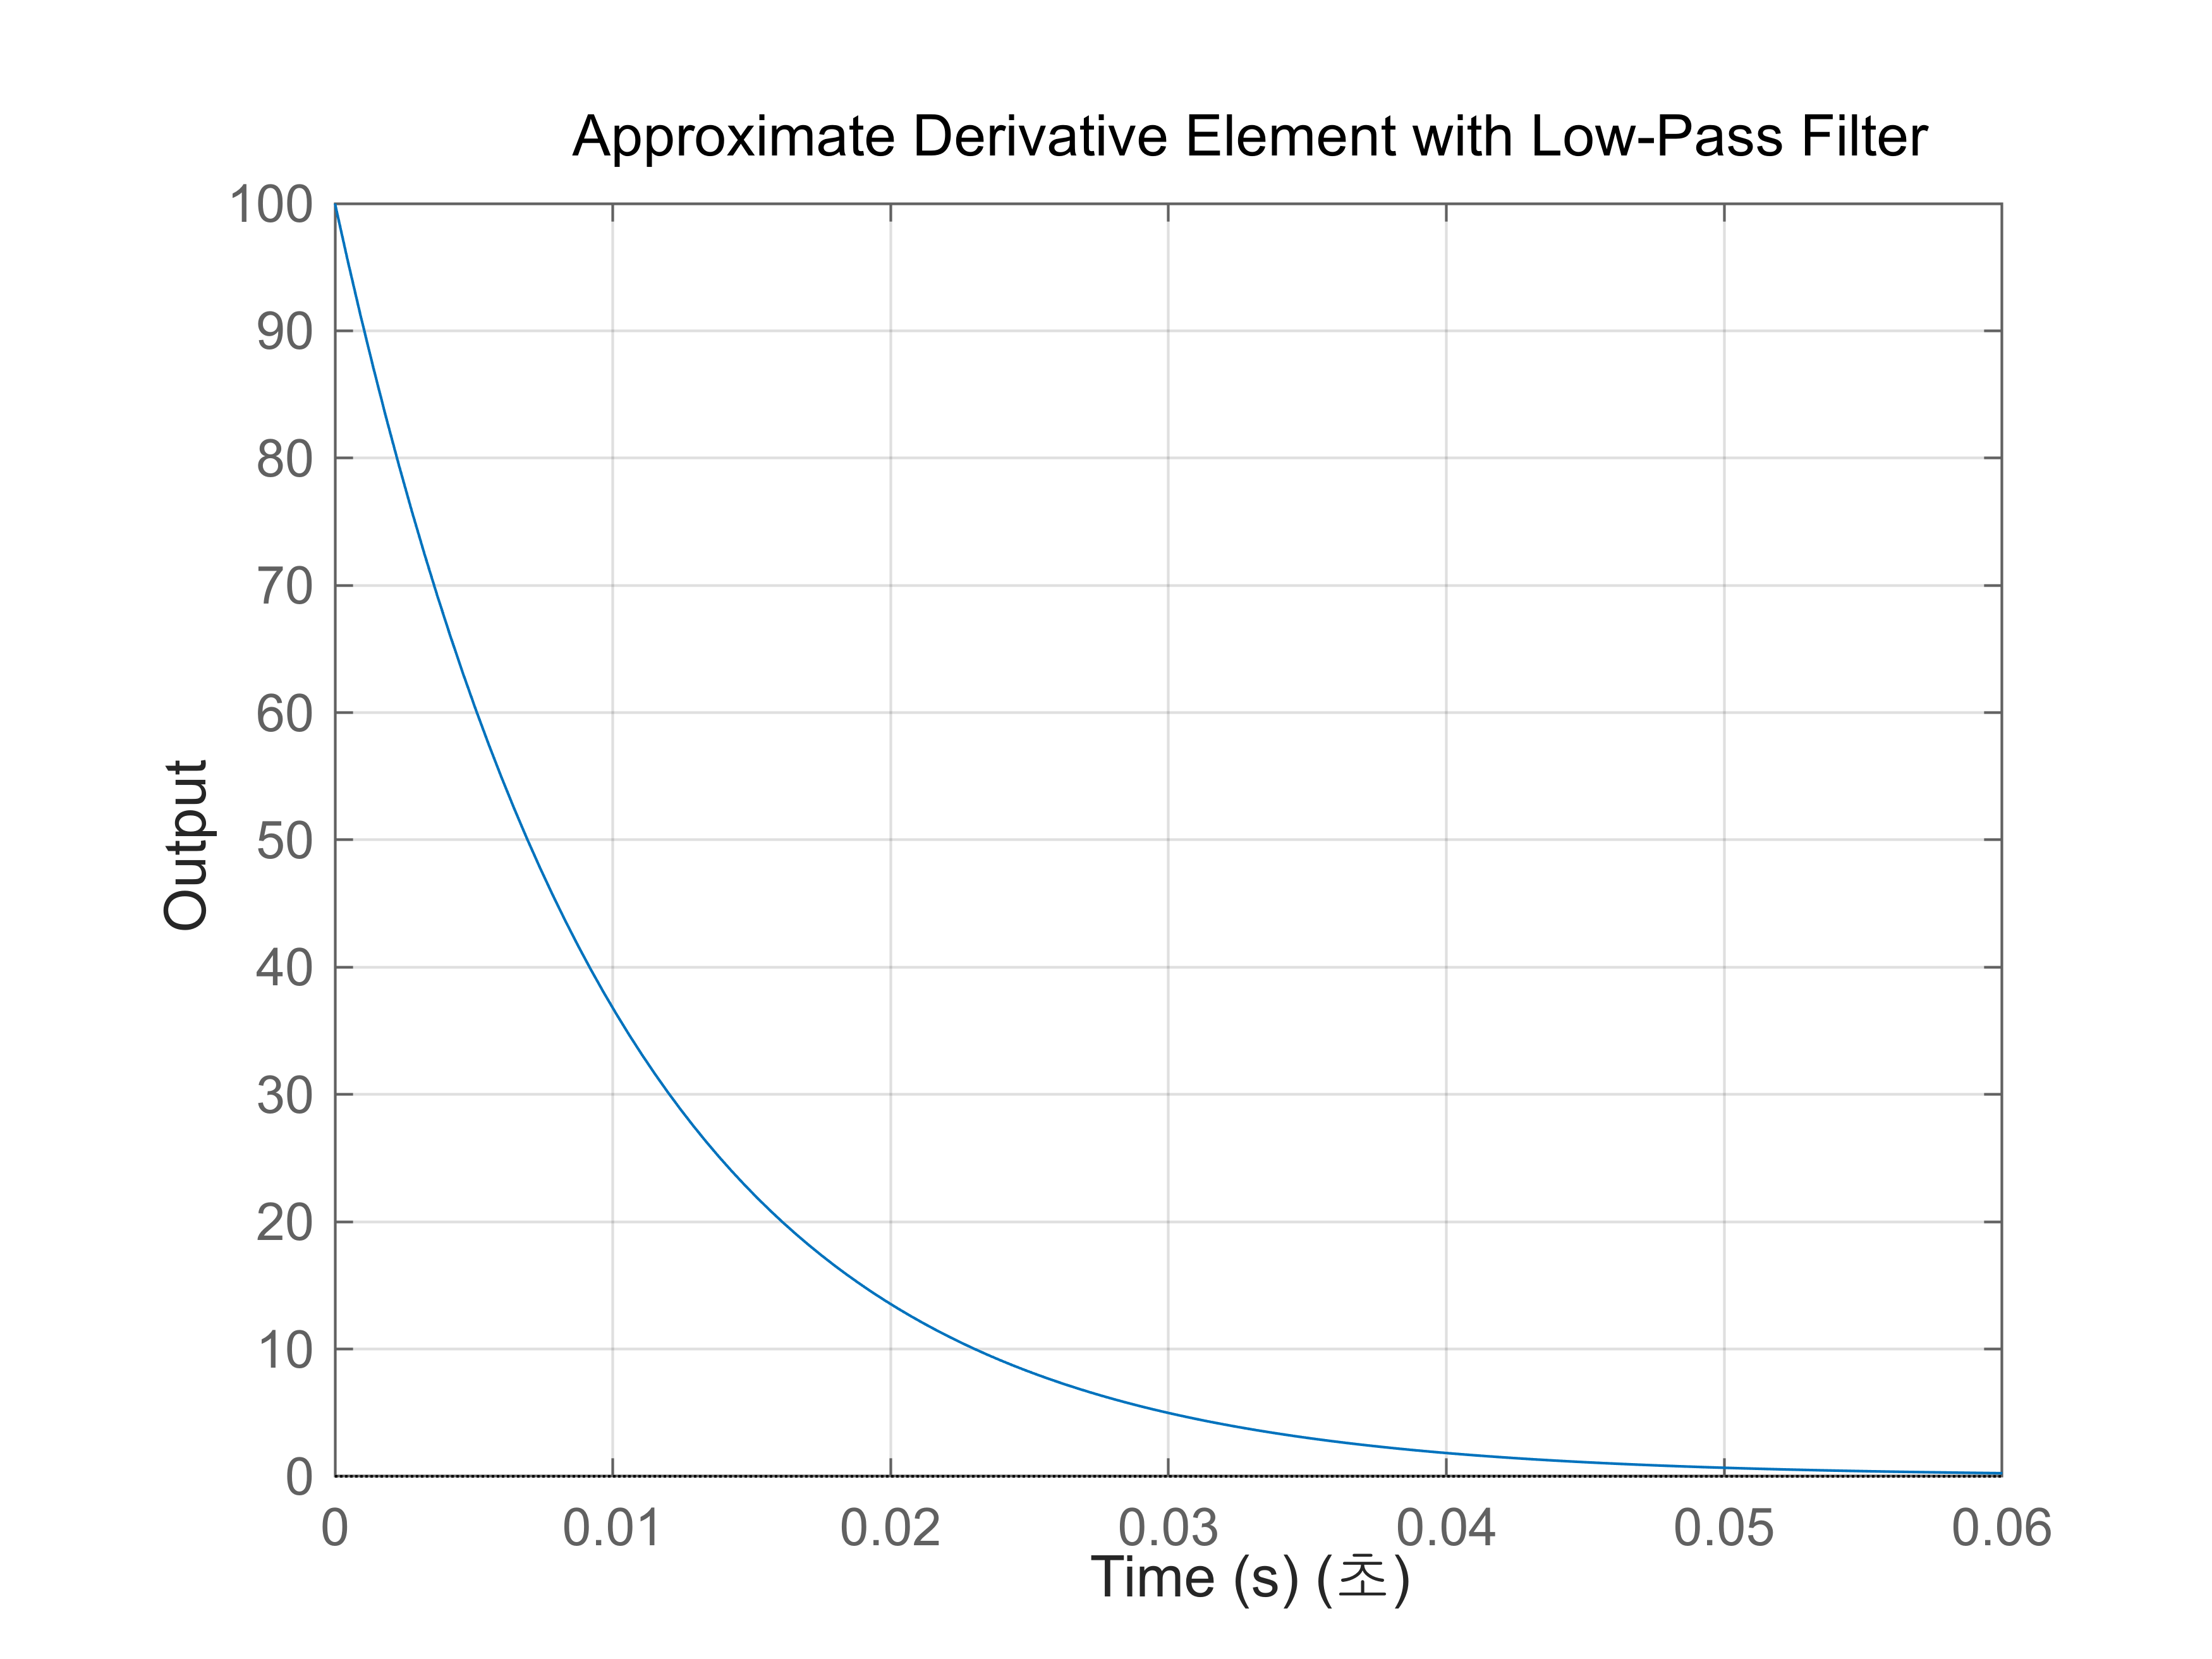

In [2]:
% 전달함수 정의
K = 1;   % 이득 (gain)
tau = 0.01;  % 작은 시간 상수

% 미분 요소 + 저역 통과 필터
s = tf('s');
G = K * s / (tau * s + 1);

% 단위 계단 응답 계산
figure;
step(G);
title('Approximate Derivative Element with Low-Pass Filter');
xlabel('Time (s)');
ylabel('Output');
grid on;



**방법 2: 고차 미분 시스템으로 근사**


미분 요소 대신 실제 시스템에서는 고차 미분기를 사용할 수 있습니다. 예를 들어, $G(s)=\frac{s}{s+1}$ 와 같은 시스템을 사용하여 미분 특성을 근사할 수 있습니다.



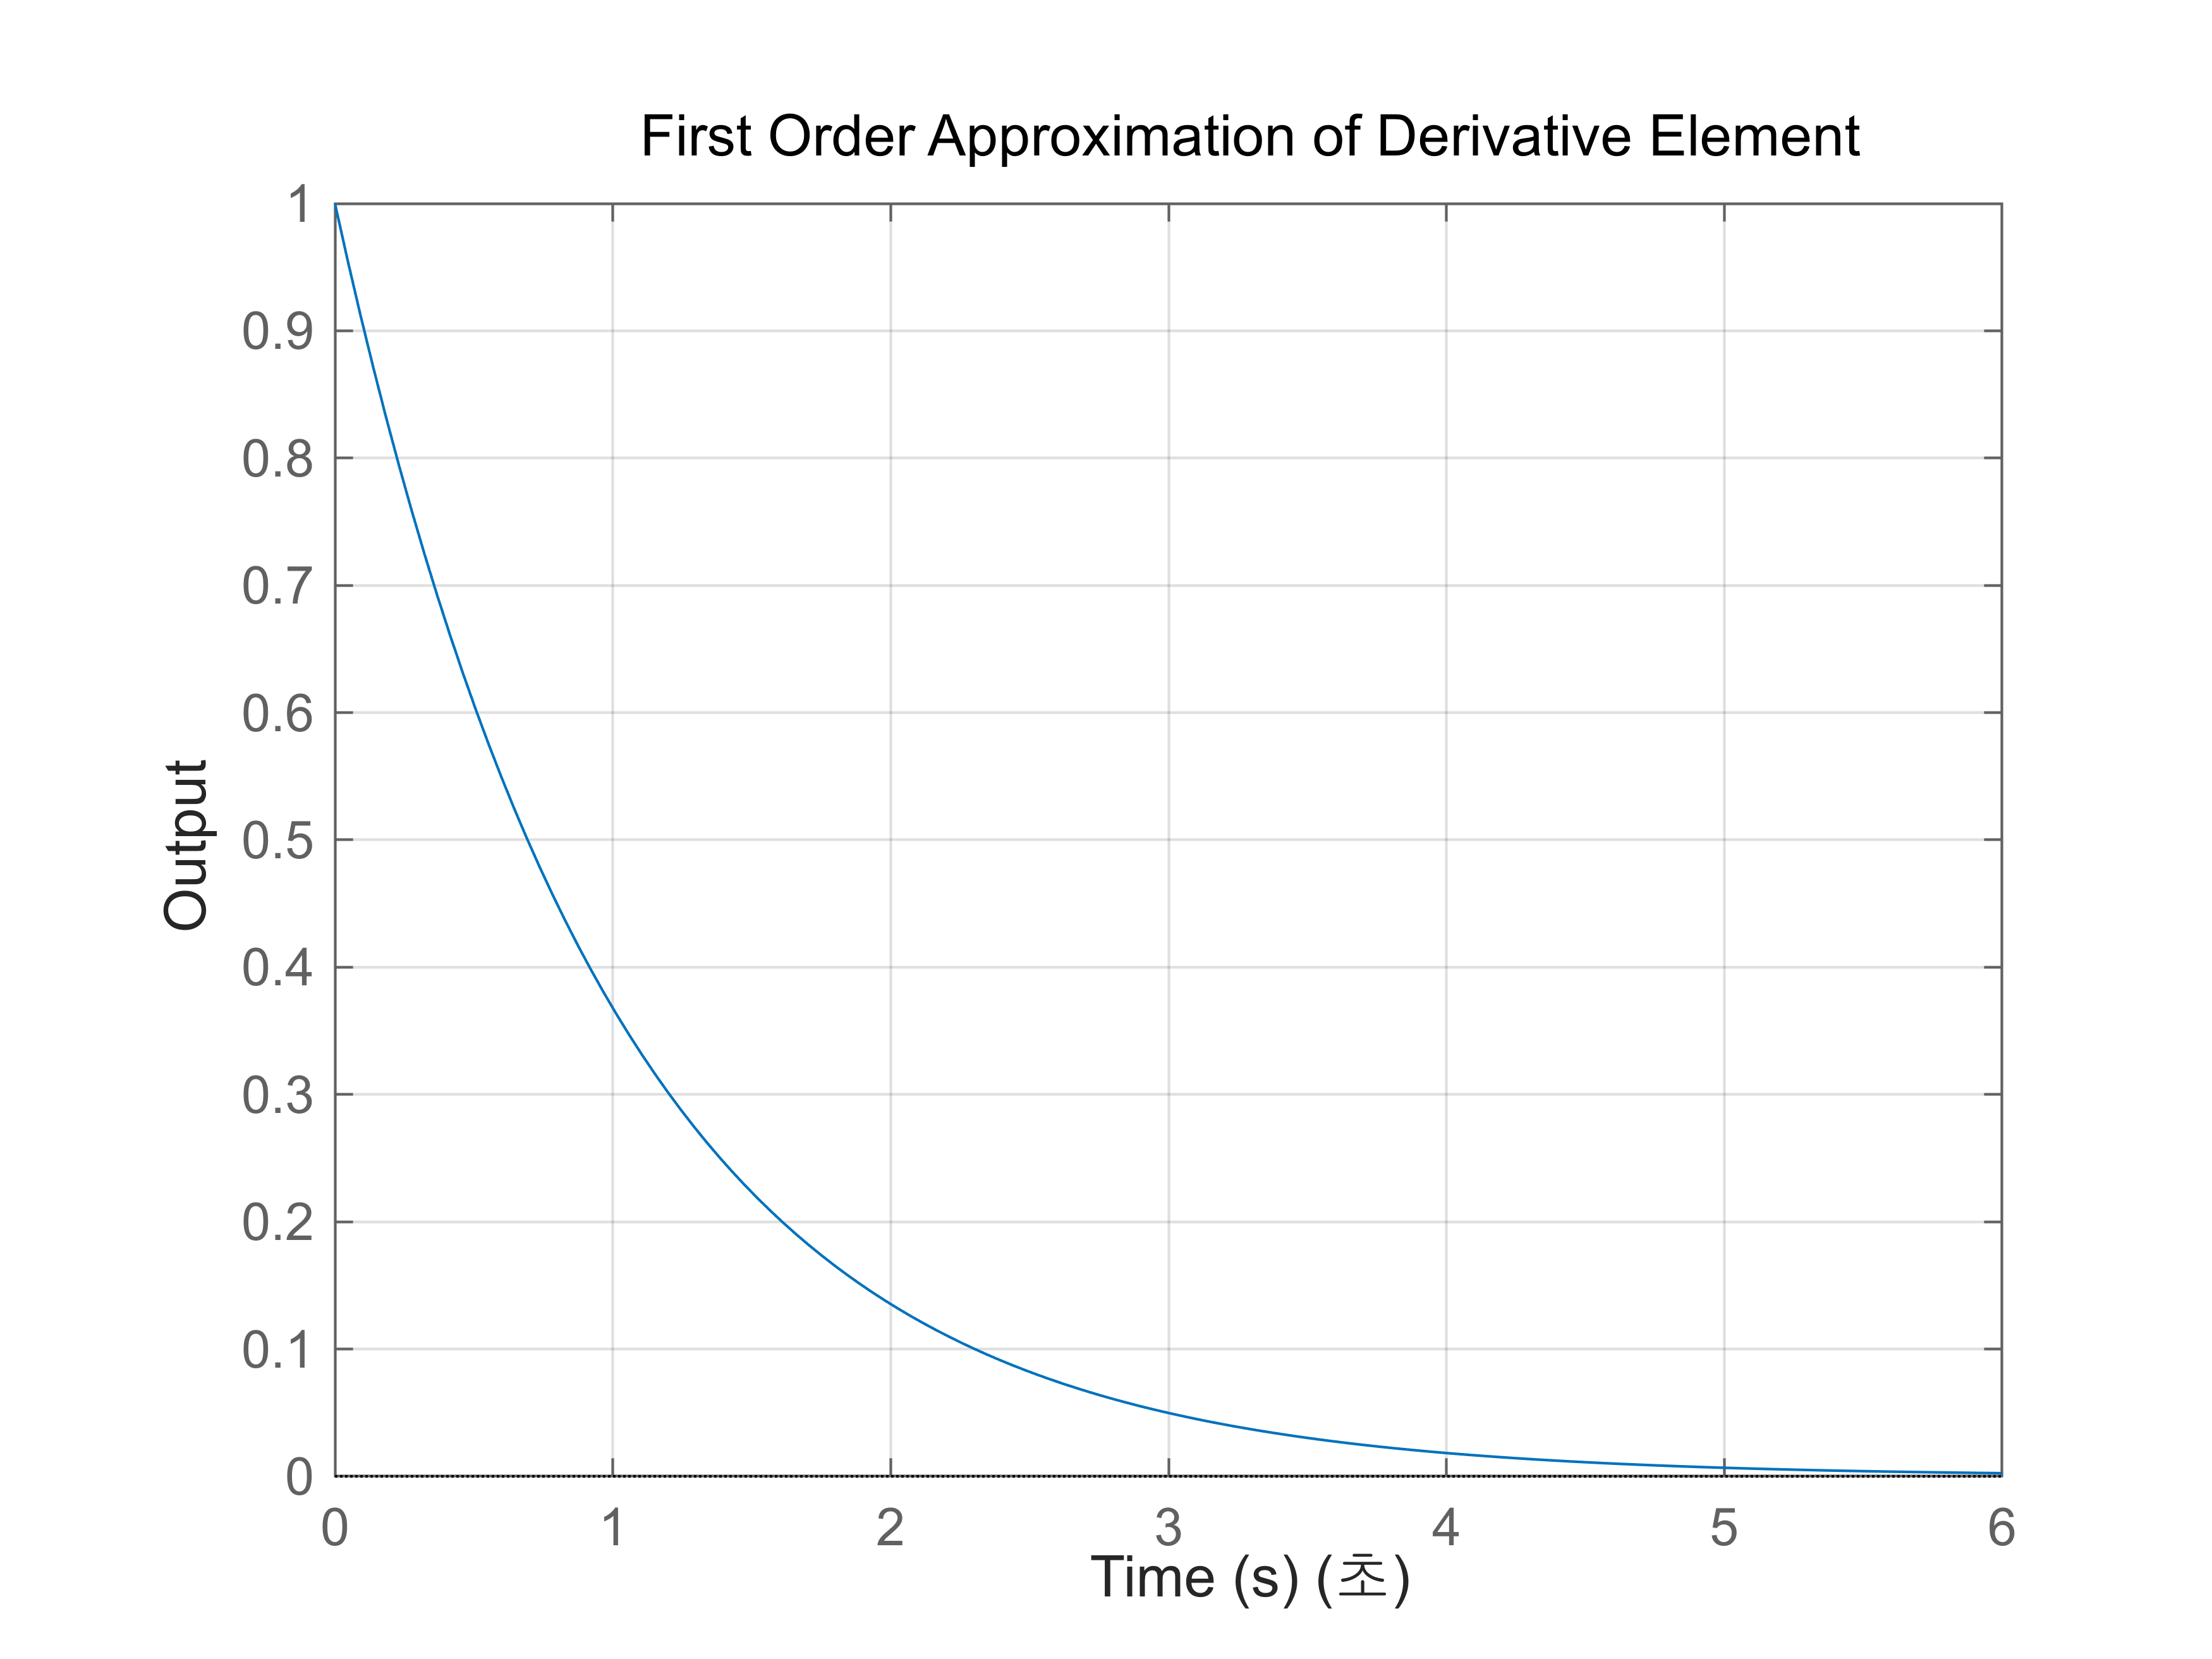

In [3]:
% 고차 미분기 시스템
K = 1;
s = tf('s');
G = K * s / (s + 1);

% 단위 계단 응답
figure;
step(G);
title('First Order Approximation of Derivative Element');
xlabel('Time (s)');
ylabel('Output');
grid on;


**미분 요소의 예****:**

-  **전기 회로에서의 미분 요소**:
-  (a) 인덕터를 사용하는 회로에서, 전압 $V_L (s)=LsI(s)$ 는 전류의 변화율에 비례합니다.
-  (b) RC 회로에서, 전압 $E_C (s)=RCsE_i (s)$ 는 입력 전압의 변화율에 비례하며, 이는 저항과 커패시터의 조합으로 이루어진 회로입니다.
-  **기계 시스템에서의 미분 요소**:
-  (c) 기계적 시스템에서, 질량 $M$ , 댐퍼 $D$ , 스프링 $K$ 로 구성된 시스템에서, 출력 힘은 입력 위치의 속도와 가속도에 비례합니다. 전달함수는 $Y(s)=\frac{Ks+D}{Ms^2 +Ds+K}X(s)$ 로 나타냅니다.

 **2.** **적분 요소****:**

-  **적분 요소는 입력 신호를 적분하여 출력을 생성하는 시스템**입니다.
-  수학적으로는 다음과 같이 정의됩니다: $Q(t)=\int_0^t x(t)dt$
-  $Q(t)$ 는 입력 $x(t)$ 의 적분이며, 이는 누적량을 나타냅니다.
-  적분 요소의 전달함수는 $G(s)=\frac{K}{s}$ ​로 표현됩니다. 이는 입력 신호를 주파수 영역에서 적분하는 것을 의미합니다.
-  **적분 요소의 물리적 예**:
-  **유량 시스템**: 물탱크에 일정한 유입량 $x(t)$ 이 들어오면, 물탱크의 높이 $y(t)$ 는 유입량을 시간에 따라 적분한 값으로 결정됩니다.
-  적분 요소는 입력에 비례하는 출력을 지속적으로 증가시키는 특징을 가지며, 이는 시간에 따라 선형으로 증가하는 형태로 나타납니다.


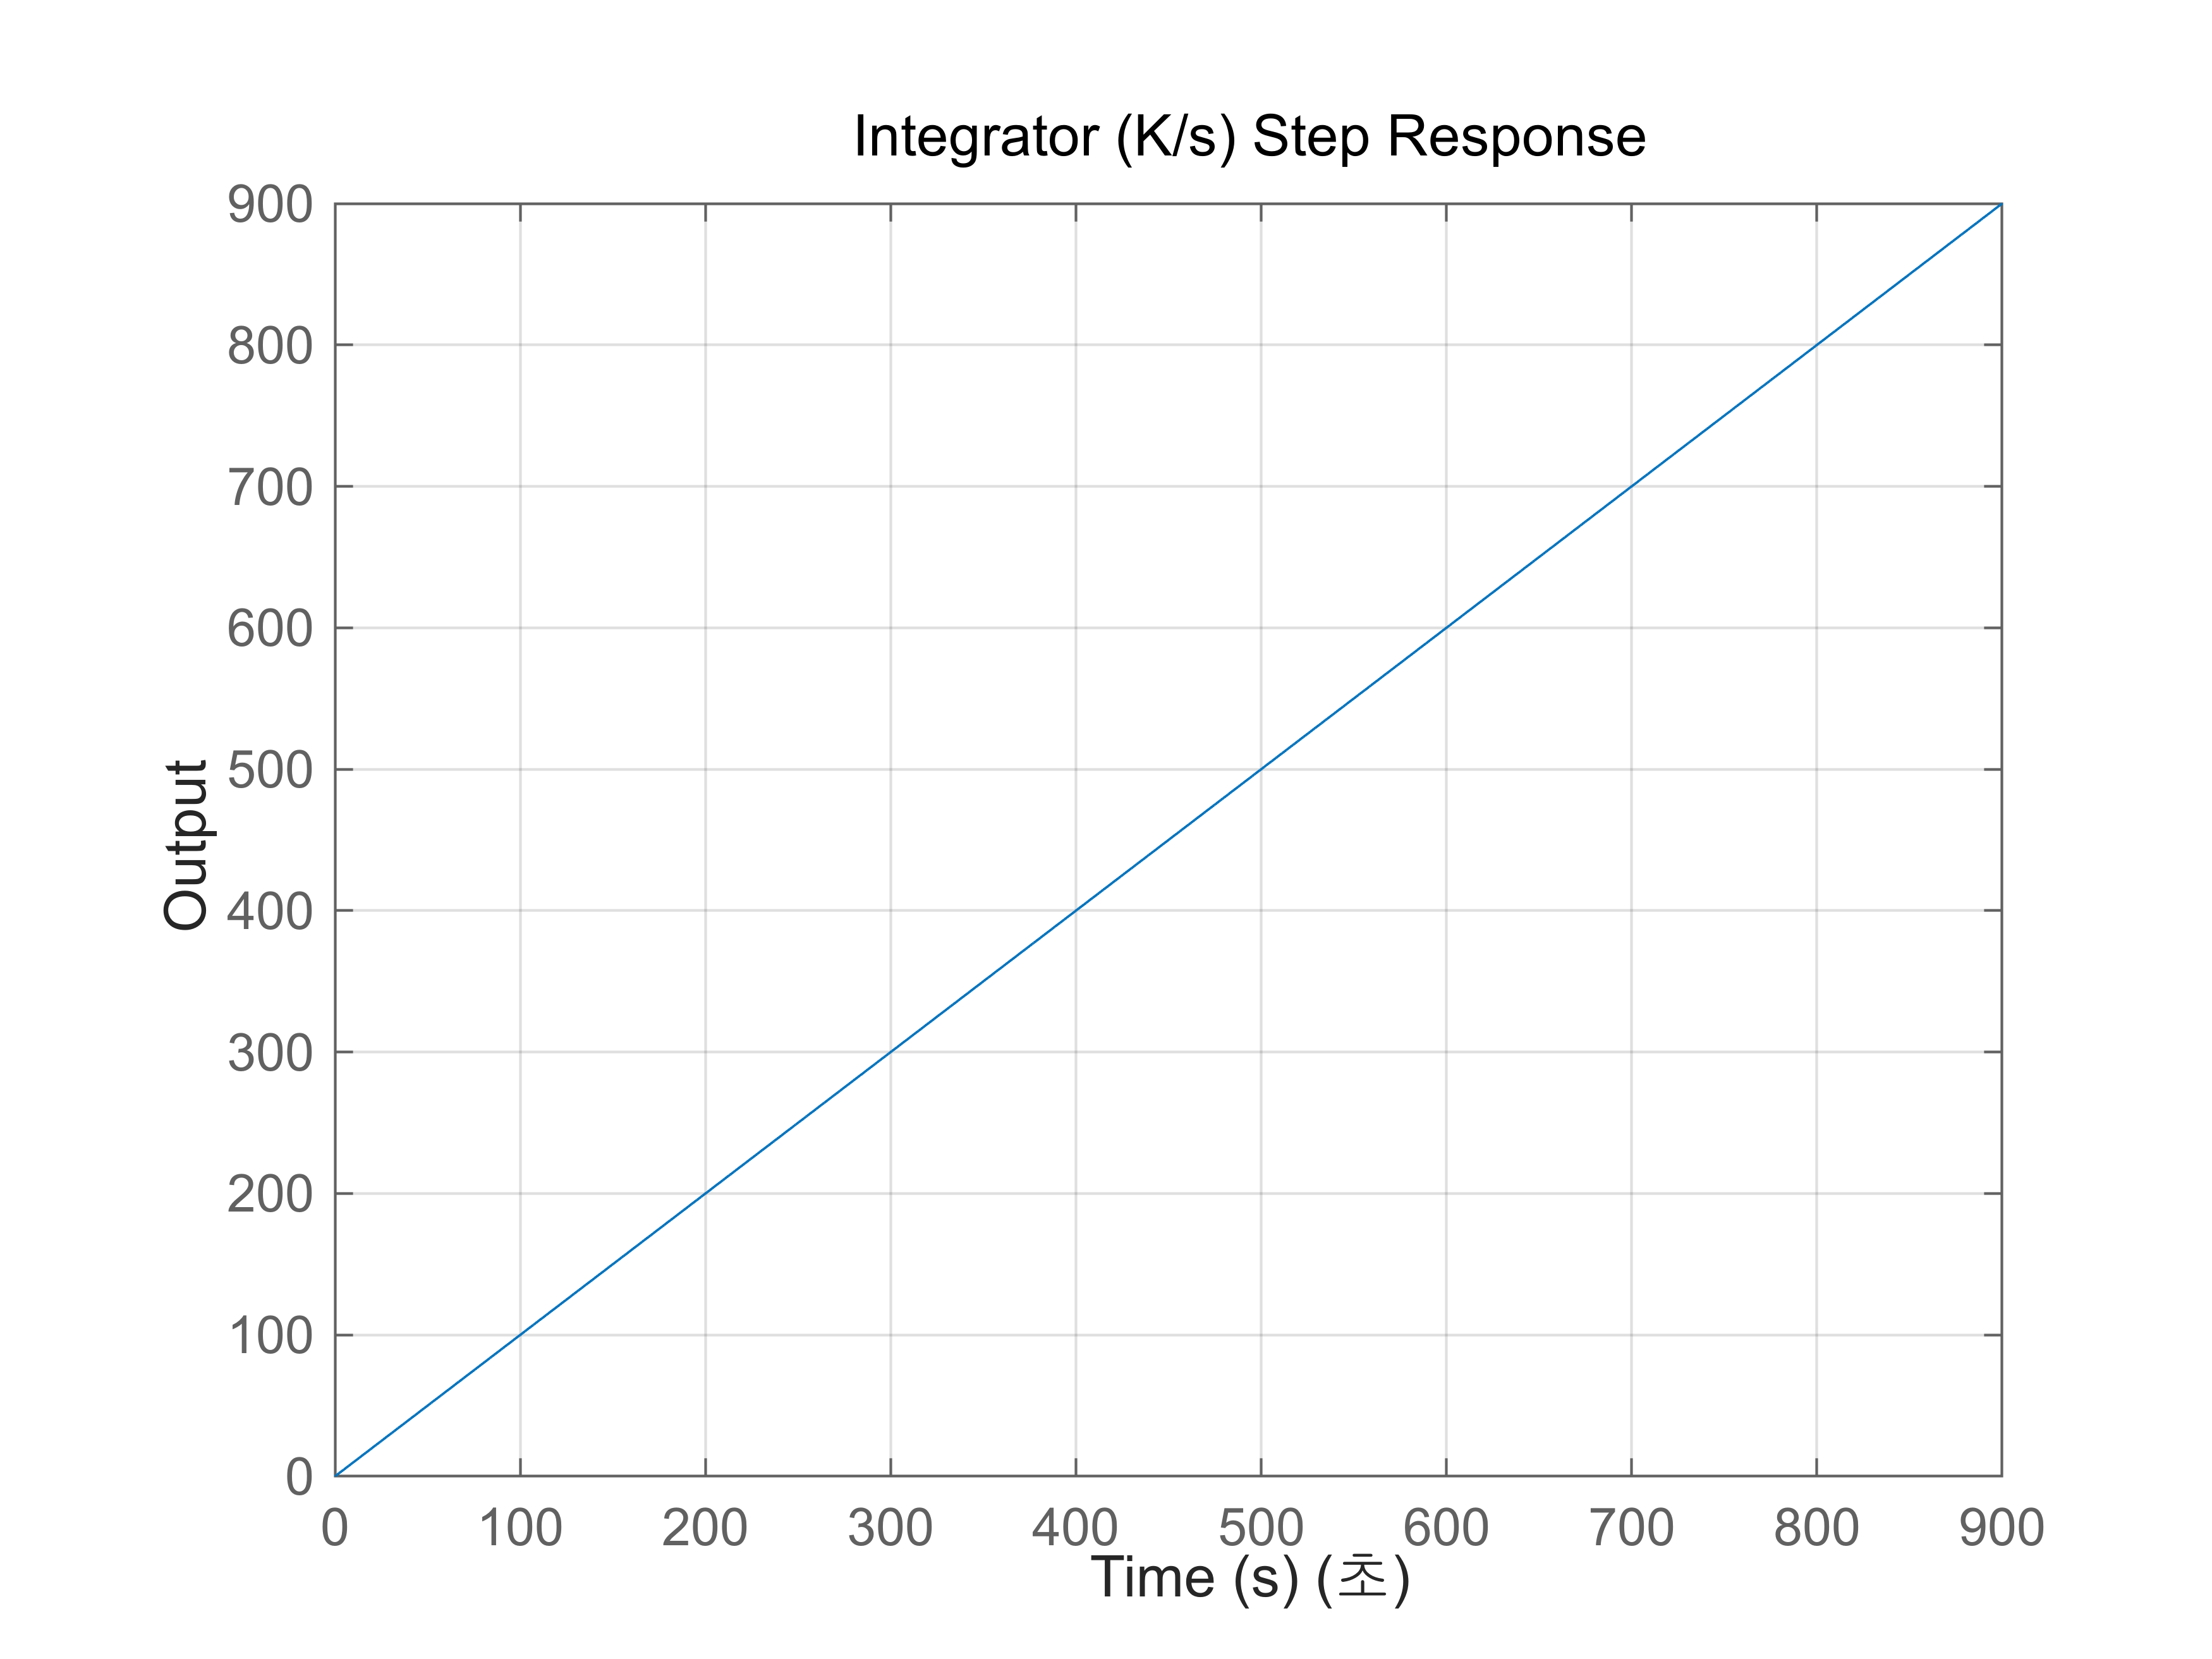

In [4]:
% 적분 요소의 전달함수 정의
K = 1;  % 이득 (gain)
s = tf('s');
G = K / s;  % 적분 요소 전달함수

% 단위 계단 응답 계산
figure;
step(G);
title('Integrator (K/s) Step Response');
xlabel('Time (s)');
ylabel('Output');
grid on;


**1.** **적분 요소의 예****:**

-  **적분 요소**는 시스템이 입력을 시간에 대해 적분하여 출력을 생성하는 경우를 의미합니다.
-  **적분 요소의 예시**:
-  (a) **수위 시스템**: 물이 일정한 유입량 $q(t)$ 으로 유입될 때, 수위 $h(t)$ 는 시간에 따른 유입량을 적분한 값으로 결정됩니다. 수학적으로 $H(s)=\frac{1}{As}Q(s)$ 로 나타낼 수 있습니다. 여기서 $A$ 는 탱크의 단면적입니다.
-  (b) **RC 회로**: 저항 $R$ 과 커패시터 $C$ 가 직렬로 연결된 회로에서 전압 $V_o (s)$ 는 입력 전류 $i(t)$ 를 적분하여 결정되며, 전달함수는 $V_o (s)=\frac{1}{Cs}I(s)$ 로 표현됩니다.

 **2.** **1차 앞선 요소****:**

-  **1차 앞선 요소**는 입력 신호가 출력 신호보다 앞서 있는 시스템을 의미합니다. 이를 통해 신호의 빠른 응답을 구현할 수 있습니다.
-  **1차 앞선 요소의 예시**:
-  (a) **RL 직렬 회로**: 인덕터 $L$ 과 저항 $R$ 이 직렬로 연결된 회로에서, 출력 전압은 입력 전압에 비례하는 방식으로 앞서갑니다. 전달함수는 $G(s)=\frac{sL+R}{L}$ 로 나타낼 수 있습니다.
-  (b) **PD 제어기**: 비례 미분 제어기(Propotional\-Derivative Controller)는 입력 신호의 변화율에 따라 출력이 반응하는 시스템으로, 주로 제어 시스템에서 사용됩니다. 이 제어기의 전달함수는 $G(s)=K_p +K_d s$ 로 표현됩니다. 여기서 $K_p$ 는 비례 이득, $K_d$ ​는 미분 이득입니다.


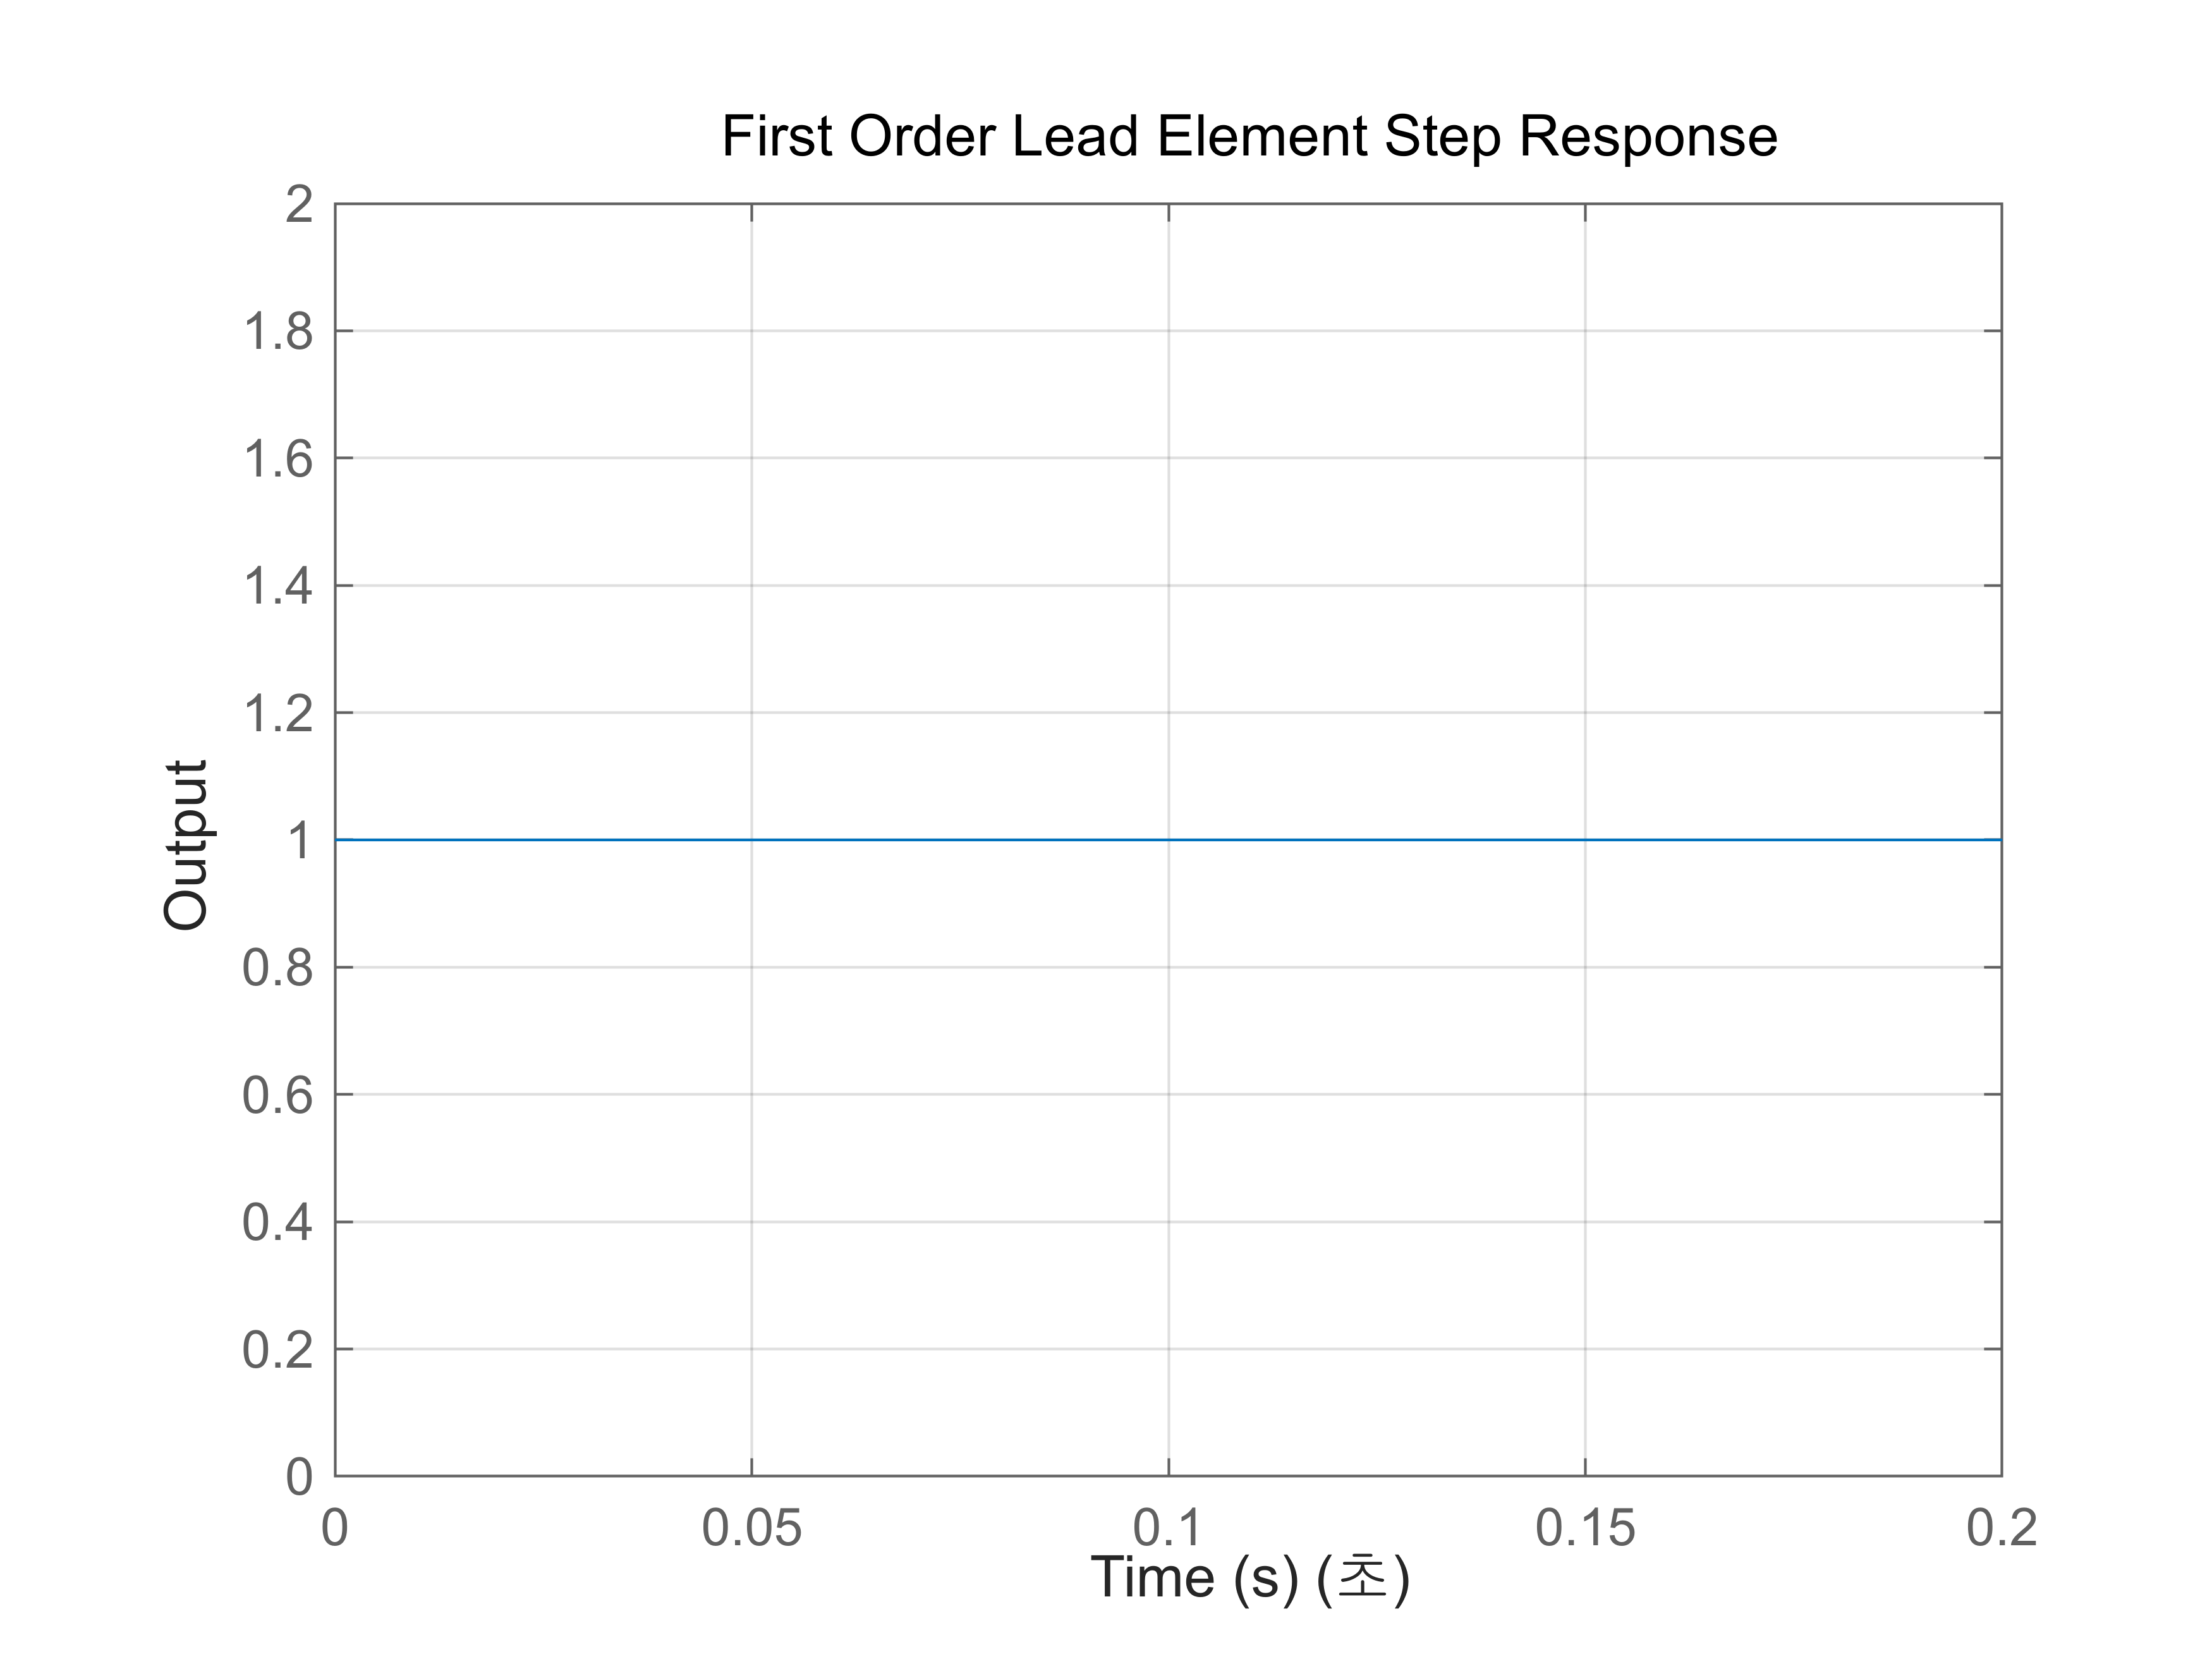

In [5]:
% 1차 앞선 요소의 전달함수 정의
K = 1;   % 이득 (gain)
T = 0.5; % 시간 상수 (time constant)

% 전달함수: G(s) = (K * (T*s + 1)) / (T*s + 1)
s = tf('s');
G = K * (T * s + 1) / (T * s + 1);

% 단위 계단 응답 계산
figure;
step(G);
title('First Order Lead Element Step Response');
xlabel('Time (s)');
ylabel('Output');
grid on;


**램프 입력 응답****:**

-  **램프 입력**은 시간에 비례하여 증가하는 입력으로, 그 수학적 표현은 $x(t)=t$ 입니다.
-  **1차 앞선 요소**에 대한 램프 입력의 전달함수는 $G(s)=\frac{s+a}{s^2 }$ 로 나타납니다.
-  이 전달함수는 다음과 같이 전개됩니다: $v_o (s)=K(s+a)\frac{1}{s^2 }=K\left(\frac{1}{s}+\frac{a}{s^2 }\right)$
-  이에 따른 시간 영역에서의 응답은: $v_o (t)=K\left(1+at\right)$ 즉, 출력은 $K$ 에 비례하는 일정한 기울기를 가진 직선 함수로 증가합니다.
-  그림에서는 1차 앞선 요소에 대한 램프 입력의 단위 계단 응답을 나타내며, 입력이 시간에 비례하여 증가함에 따라 출력도 일정한 비율로 증가하는 것을 보여줍니다.

 **2.** **1차 지연 요소****:**

-  **1차 지연 요소**는 입력 신호가 지연된 후에 출력 신호로 반영되는 시스템을 나타냅니다.
-  전기회로에서 **RL 회로**가 그 대표적인 예입니다. 이 회로는 인덕터 $L$ 과 저항 $R$ 로 구성됩니다.
-  1차 지연 시스템의 전달함수는 다음과 같습니다: $G(s)=\frac{I(s)}{V(s)}=\frac{1}{Ls+R}$ ​
-  여기서 $a=\frac{R}{L}$ ​이며, 이 전달함수는 지연된 응답 특성을 나타냅니다. 이는 입력이 주어졌을 때, 인덕터의 특성에 따라 전류가 점진적으로 증가하는 것을 설명합니다.
-  수학적으로는 다음의 미분 방정식으로 표현됩니다: $L\frac{di(t)}{dt}+Ri(t)=v(t)$
-  이는 전압이 전류에 대해 지연된 영향을 미치는 전형적인 1차 시스템입니다.


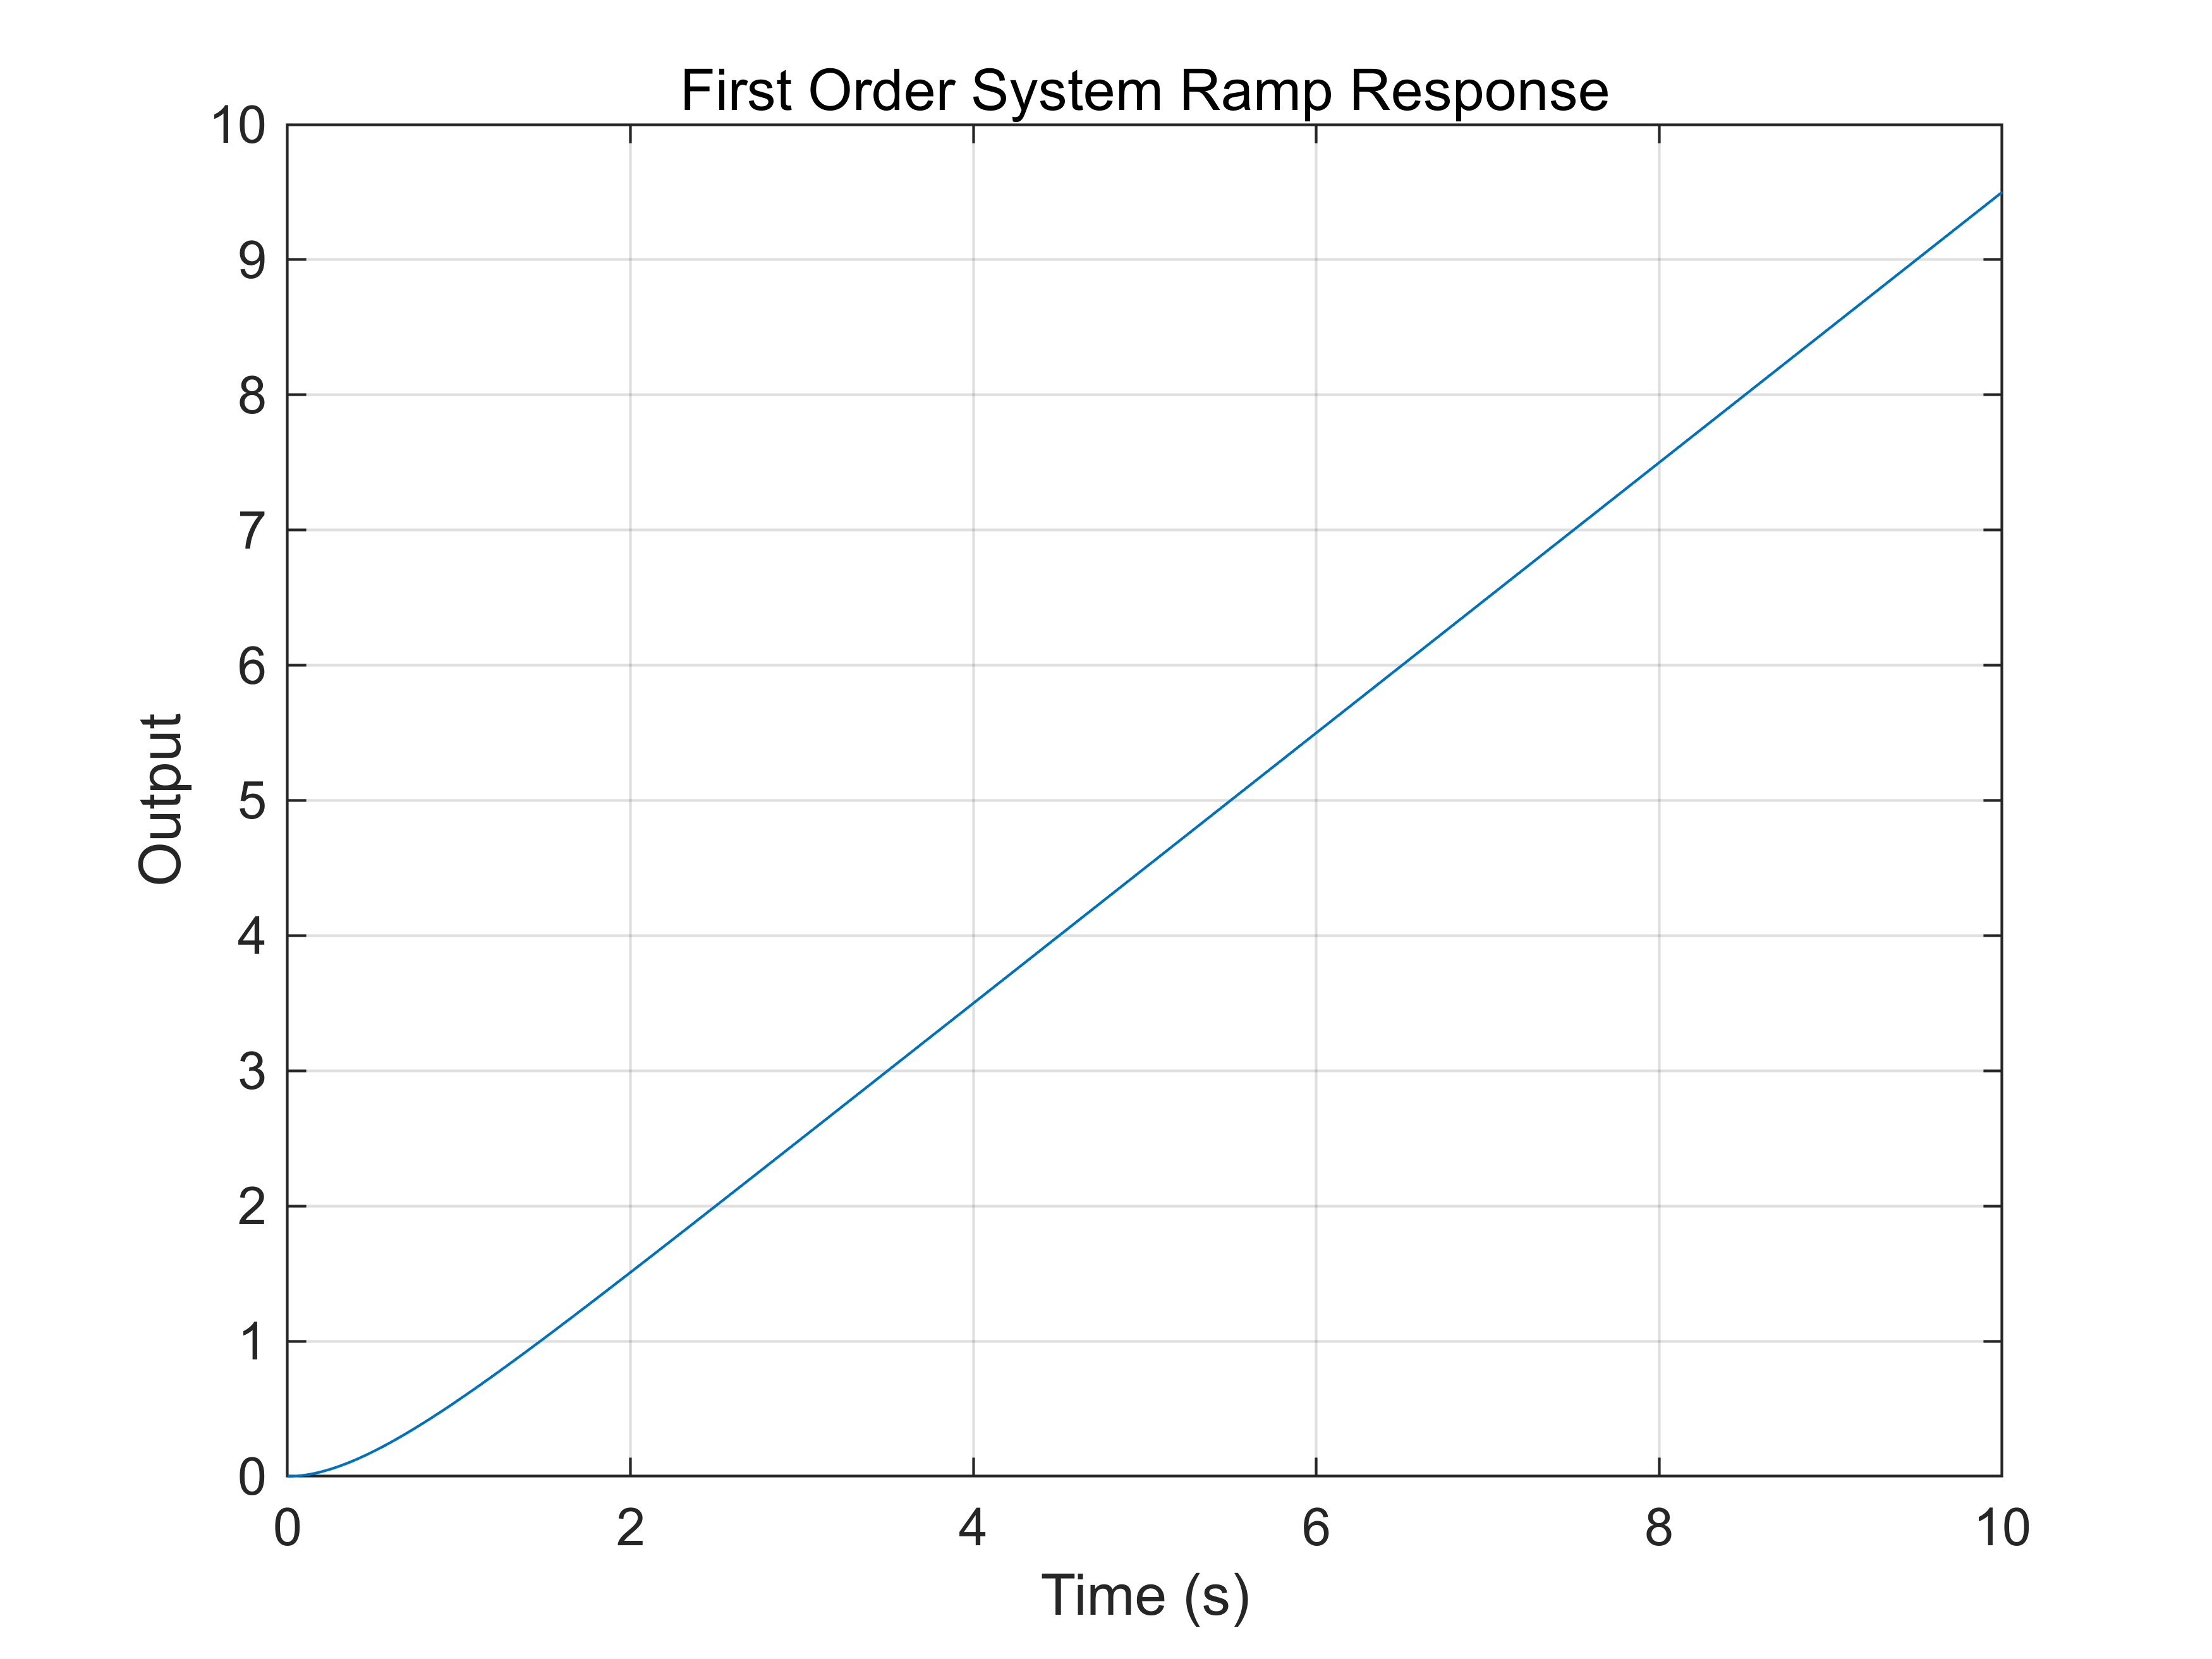

In [6]:
% 1차 지연 요소의 전달함수 정의
K = 1;   % 이득 (gain)
T = 0.5; % 시간 상수 (time constant)

% 전달함수: G(s) = K / (T*s + 1)
s = tf('s');
G = K / (T * s + 1);

% 램프 입력 정의
t = 0:0.01:10;  % 시간 벡터
ramp_input = t; % 램프 입력

% 시스템 응답 계산
[y, t] = lsim(G, ramp_input, t);

% 결과 그래프 그리기
figure;
plot(t, y);
title('First Order System Ramp Response');
xlabel('Time (s)');
ylabel('Output');
grid on;


**1.** **시간 지연 시스템의 단위 계단 입력에 대한 시간 응답****:**

-  **단위 계단 입력**이란 시간이 0일 때 입력이 1로 변하는 신호입니다.
-  1차 지연 시스템의 전달함수는 다음과 같이 주어집니다: $G(s)=\frac{K}{s+a}$ ​
-  이 전달함수는 시간 영역에서의 응답을 분석할 수 있는 수식을 제공합니다.
-  단위 계단 입력에 대한 시간 응답은 라플라스 변환을 사용하여 다음과 같이 표현됩니다: $i(t)=K_1 \left(1-e^{-at} \right)$ 여기서 $K_1 =\frac{K}{a}$ 입니다. 이는 시간이 지남에 따라 출력이 점진적으로 증가하여 안정화되는 1차 지연 시스템의 특성을 보여줍니다.
-  그림에서 보면 입력이 0에서 1로 계단식으로 변화할 때 출력은 곡선 형태로 점진적으로 증가하여 일정한 값에 수렴하는 것을 확인할 수 있습니다. 이는 1차 시스템의 전형적인 응답 형태입니다.

 **2.** **1차 지연 요소의 예****:**

-  **RC 직렬 회로**:
-  (a) **RC 회로**에서 저항 $R$ 과 커패시터 $C$ 가 직렬로 연결된 경우, 출력 전압은 커패시터에 걸리는 전압으로 나타나며, 그 전달함수는 다음과 같습니다: $V_o (s)=\frac{R}{RCs+1}V_i (s)$
-  이는 전압이 점진적으로 충전 및 방전되는 1차 지연 시스템을 나타냅니다.
-  **유체 시스템**:
-  (b) **유체 시스템**에서 탱크에 일정한 유량이 들어올 때 수위가 증가하는 모델을 보여줍니다.
-  전달함수는 다음과 같이 나타낼 수 있습니다: $H(s)=\frac{R}{RAs+1}Q(s)$
-  이 또한 입력 유량이 점진적으로 수위를 높이는 지연된 응답을 보여줍니다.


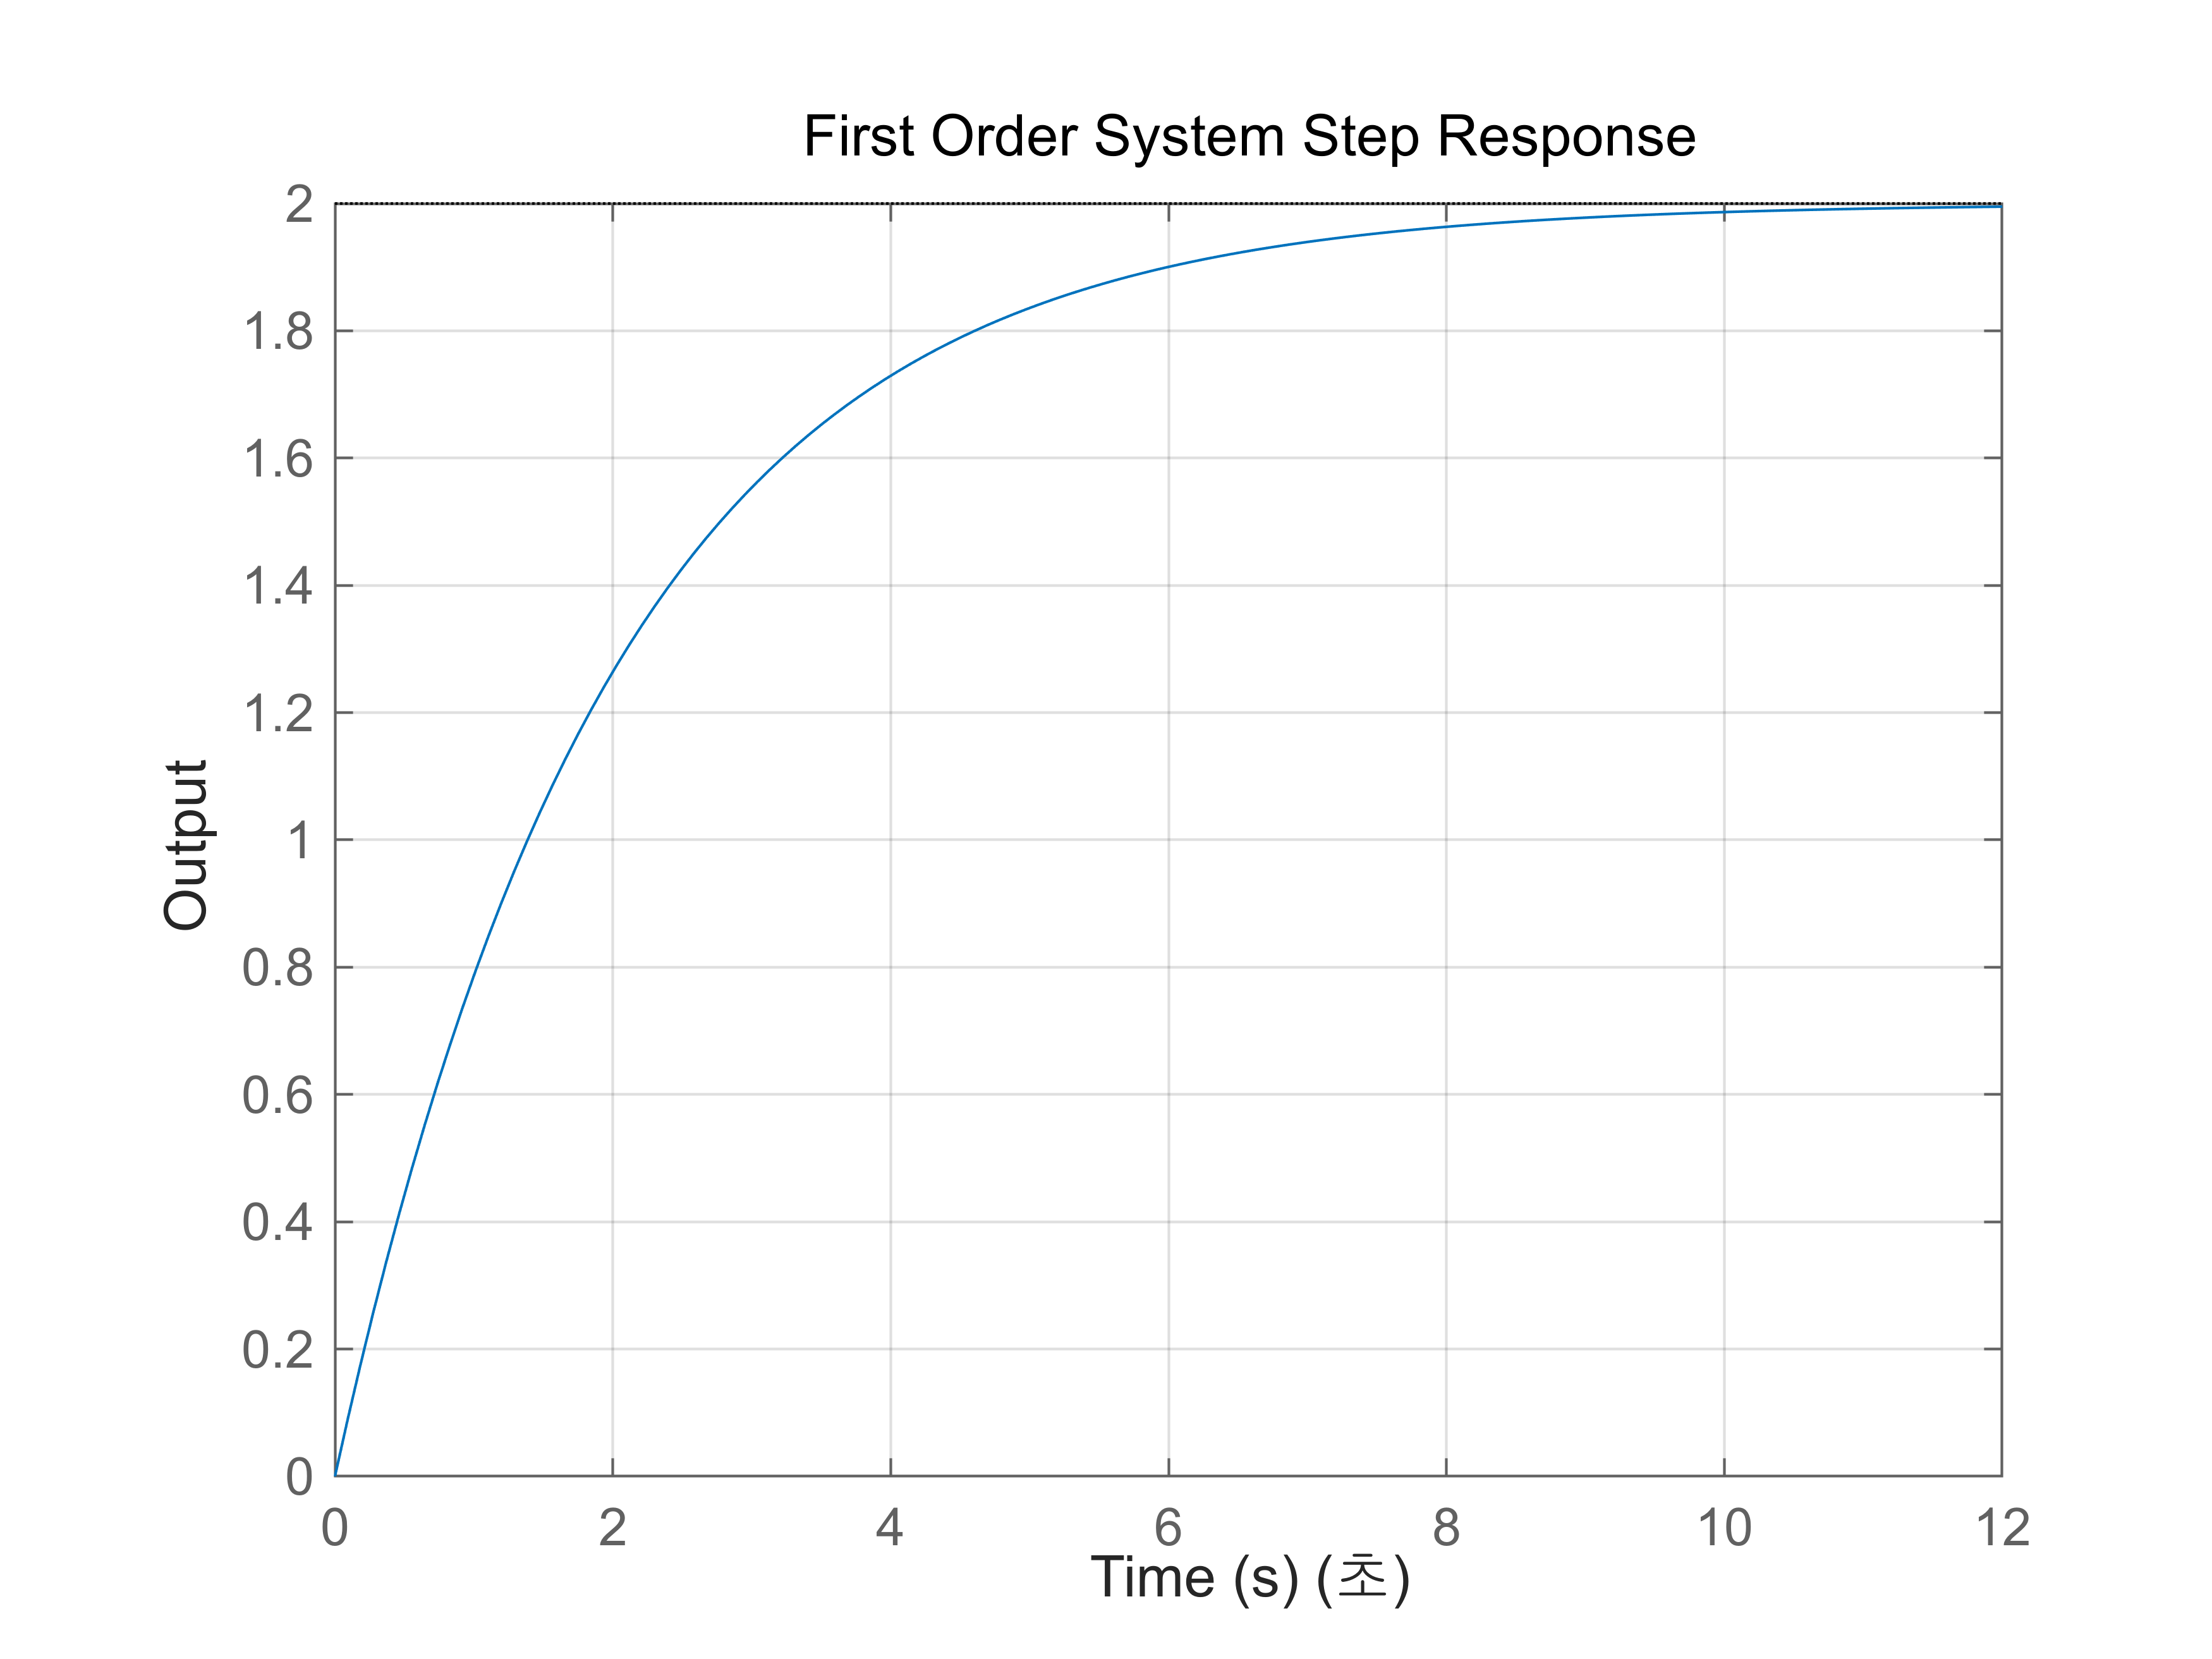

In [7]:
% 1차 지연 요소의 전달함수 정의
K = 1;   % 시스템 이득 (gain)
a = 0.5; % 시간 상수 (time constant)

% 전달함수: G(s) = K / (s + a)
s = tf('s');
G = K / (s + a);

% 단위 계단 응답 계산
figure;
step(G);
title('First Order System Step Response');
xlabel('Time (s)');
ylabel('Output');
grid on;


**2차 지연 요소****:**

-  2차 지연 요소는 두 개의 에너지 저장 장치(예: 스프링과 질량)를 포함하는 시스템으로, 두 개의 미분 방정식으로 설명됩니다.
-  2차 지연 시스템의 전달함수는 다음과 같습니다: $G(s)=\frac{Y(s)}{F(s)}=\frac{1}{Ms^2 +Ds+K}$ 여기서:
-  $M$ 은 질량
-  $D$ 는 댐퍼 계수
-  $K$ 는 스프링 상수입니다.
-  수학적으로 시스템의 시간 응답은 다음과 같이 표현됩니다: $y(t)=K_1 +K_2 e^{-\alpha t} +K_3 e^{-\beta t}$ 이는 과도 응답과 정상 상태 응답을 나타내는 지수 함수 형태입니다.
-  그림에 보이는 시스템은 질량 $M$ , 스프링 $K$ , 댐퍼 $D$ 로 이루어진 기계적 시스템을 나타냅니다.

 **2.** **2차 지연 요소의 단위 계단 입력 응답****:**

-  2차 지연 시스템에 단위 계단 입력을 가하면, 시스템의 응답은 다음과 같은 형태를 취합니다: $y(t)=K_1 +K_2 e^{-\alpha t} +K_3 e^{-\beta t}$ 이 응답은 **과도 상태**와 **정상 상태**로 나뉘며, 과도 상태에서 진동 또는 감쇠가 나타날 수 있습니다.
-  그래프에서 보이는 것처럼 2차 시스템은 경우에 따라 **오버슈트**(초과 응답)가 발생할 수 있으며, 이후 감쇠되어 일정한 값에 수렴하는 형태를 보입니다.

 **3.** **2차 지연 요소의 응답 예****:**

-  (a) **RLC 회로**:
-  전기적 예시로는 **RLC 회로**가 있으며, 이 회로의 전달함수는 다음과 같습니다: $V_o (s)=\frac{1}{LCs^2 +RCs+1}V_i (s)$
-  이는 2차 지연 요소의 전형적인 형태로, RLC 회로에서 에너지가 스프링(인덕터)과 질량(커패시터)에 저장되는 방식으로 동작합니다.
-  (b) **유체 시스템**:
-  유체 시스템에서는 탱크 내의 수위가 두 개의 유량 제어 요소에 의해 조절됩니다. 전달함수는 다음과 같이 표현됩니다: $Q_o (s)=\frac{R}{RAs^2 +RBs+1}Q_i (s)$
-  이는 물의 흐름과 수위 변화가 시간이 지남에 따라 어떻게 변화하는지를 설명합니다.


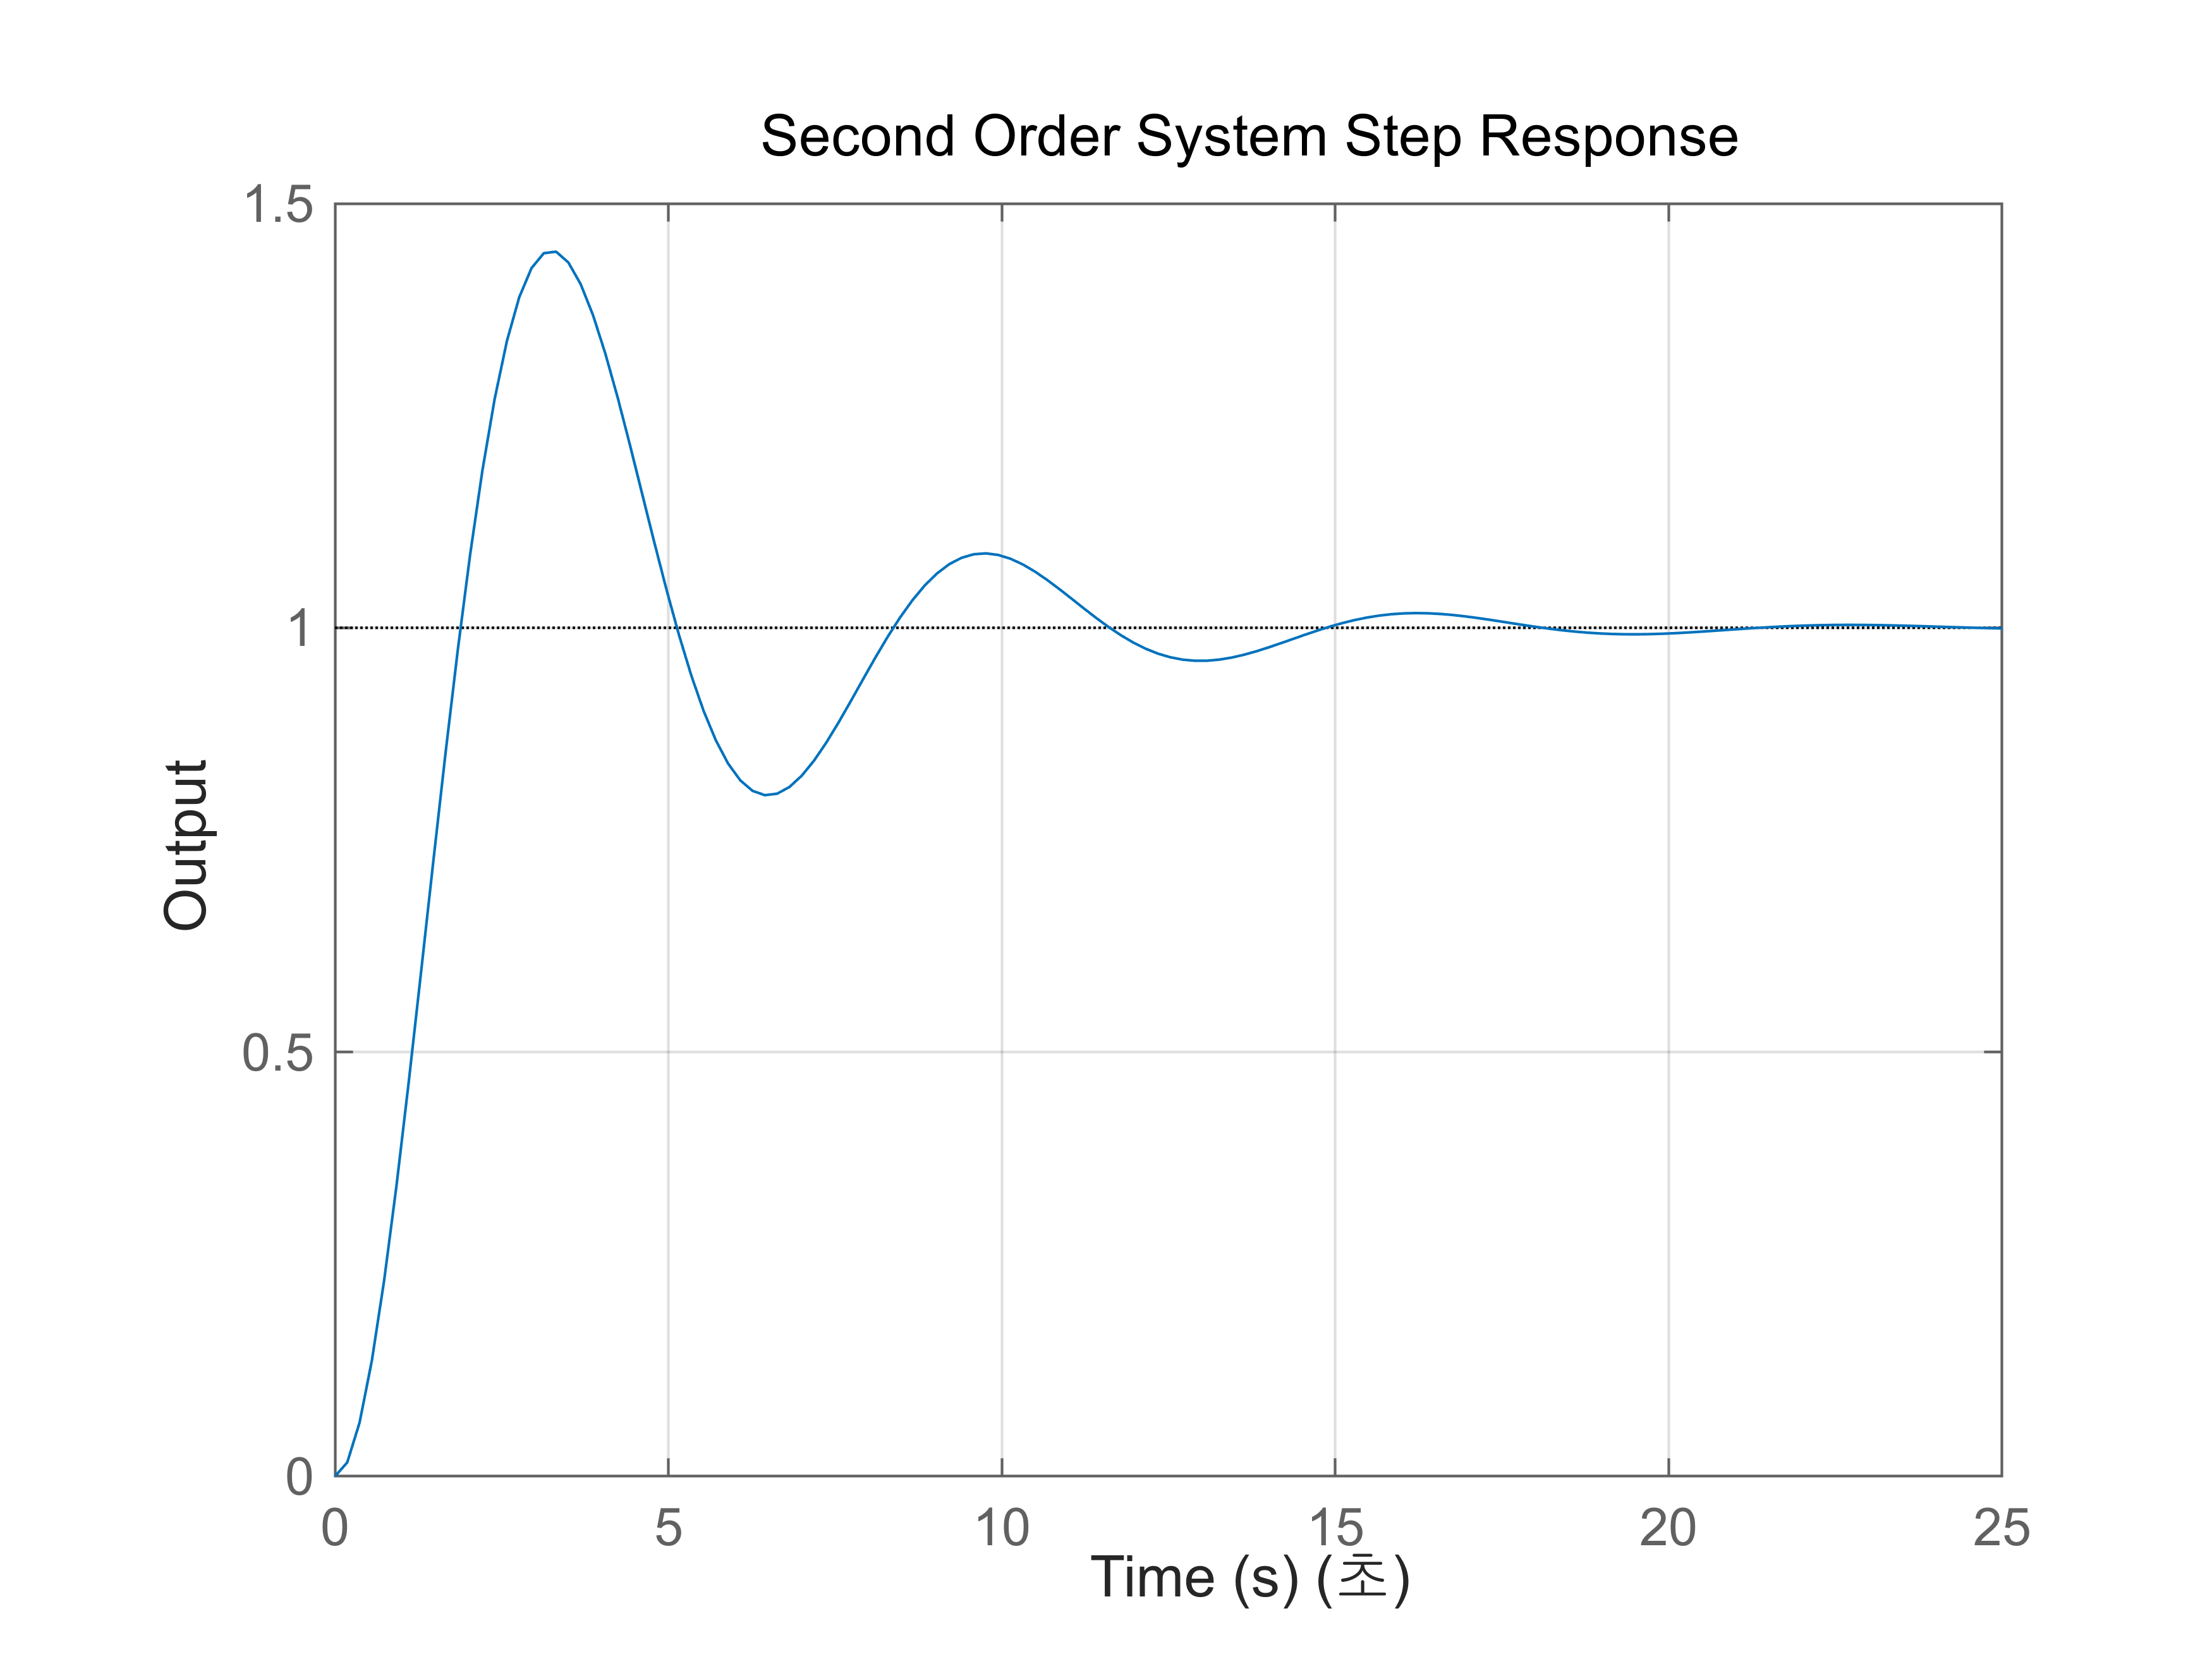

In [8]:
% 2차 지연 요소의 전달함수 정의
M = 1;   % 질량
D = 0.5; % 댐퍼 계수
K = 1;   % 스프링 상수

% 전달함수: G(s) = 1 / (Ms^2 + Ds + K)
s = tf('s');
G = 1 / (M*s^2 + D*s + K);

% 단위 계단 응답 계산
figure;
step(G);
title('Second Order System Step Response');
xlabel('Time (s)');
ylabel('Output');
grid on;


**2차 지연 특성의 예 \- RLC 회로****:**

-  **RLC 직렬 회로**는 저항 $R$ , 인덕터 $L$ , 커패시터 $C$ 가 직렬로 연결된 회로입니다. 이 회로의 동작은 2차 미분 방정식으로 표현됩니다.
-  전기 회로에서, 전압과 전류의 관계를 나타내는 미분 방정식은 다음과 같습니다: $Ri(t)+\frac{1}{C}\int_0^t i(\tau )d\tau +L\frac{di(t)}{dt}=v(t)$ 이 방정식은 각각 저항, 커패시터, 인덕터에서의 전압 강하를 포함합니다.
-  라플라스 변환을 적용하면, 전달함수는 다음과 같이 표현됩니다: $G(s)=\frac{V_o (s)}{V_i (s)}=\frac{1}{LCs^2 +RCs+1}$ 이는 2차 지연 시스템으로, 시간에 따라 전류와 전압이 지연된 응답을 보입니다.
-  이 회로는 RLC 회로에서 에너지가 축적되고, 소멸되는 과정을 설명하며, 이러한 시스템은 진동 또는 감쇠가 발생하는 특성을 보일 수 있습니다.

 **2.** **2차 지연 특성의 예 \- 유체 시스템****:**

-  두 번째 예시는 **유체 시스템**입니다. 이 시스템에서는 물탱크에 유입과 유출이 동시에 발생하며, 이를 통해 2차 지연 특성을 설명합니다.
-  수위 변화는 다음과 같은 방정식으로 설명될 수 있습니다: $H(s)=\frac{R}{RAs^2 +RBs+1}Q_i (s)$ 여기서:
-  $A_1 (t),A_2 (t)$ 는 탱크의 유체 양
-  $R_1 ,R_2$ ​는 저항을 의미하며, 유체 흐름의 저항을 나타냅니다.
-  이러한 시스템은 시간에 따라 물의 흐름이 지연되고, 탱크의 수위가 점진적으로 변화하는 특성을 나타냅니다. 이는 유입량과 유출량의 상호작용으로 인해 발생하는 2차 지연 시스템의 특성입니다.


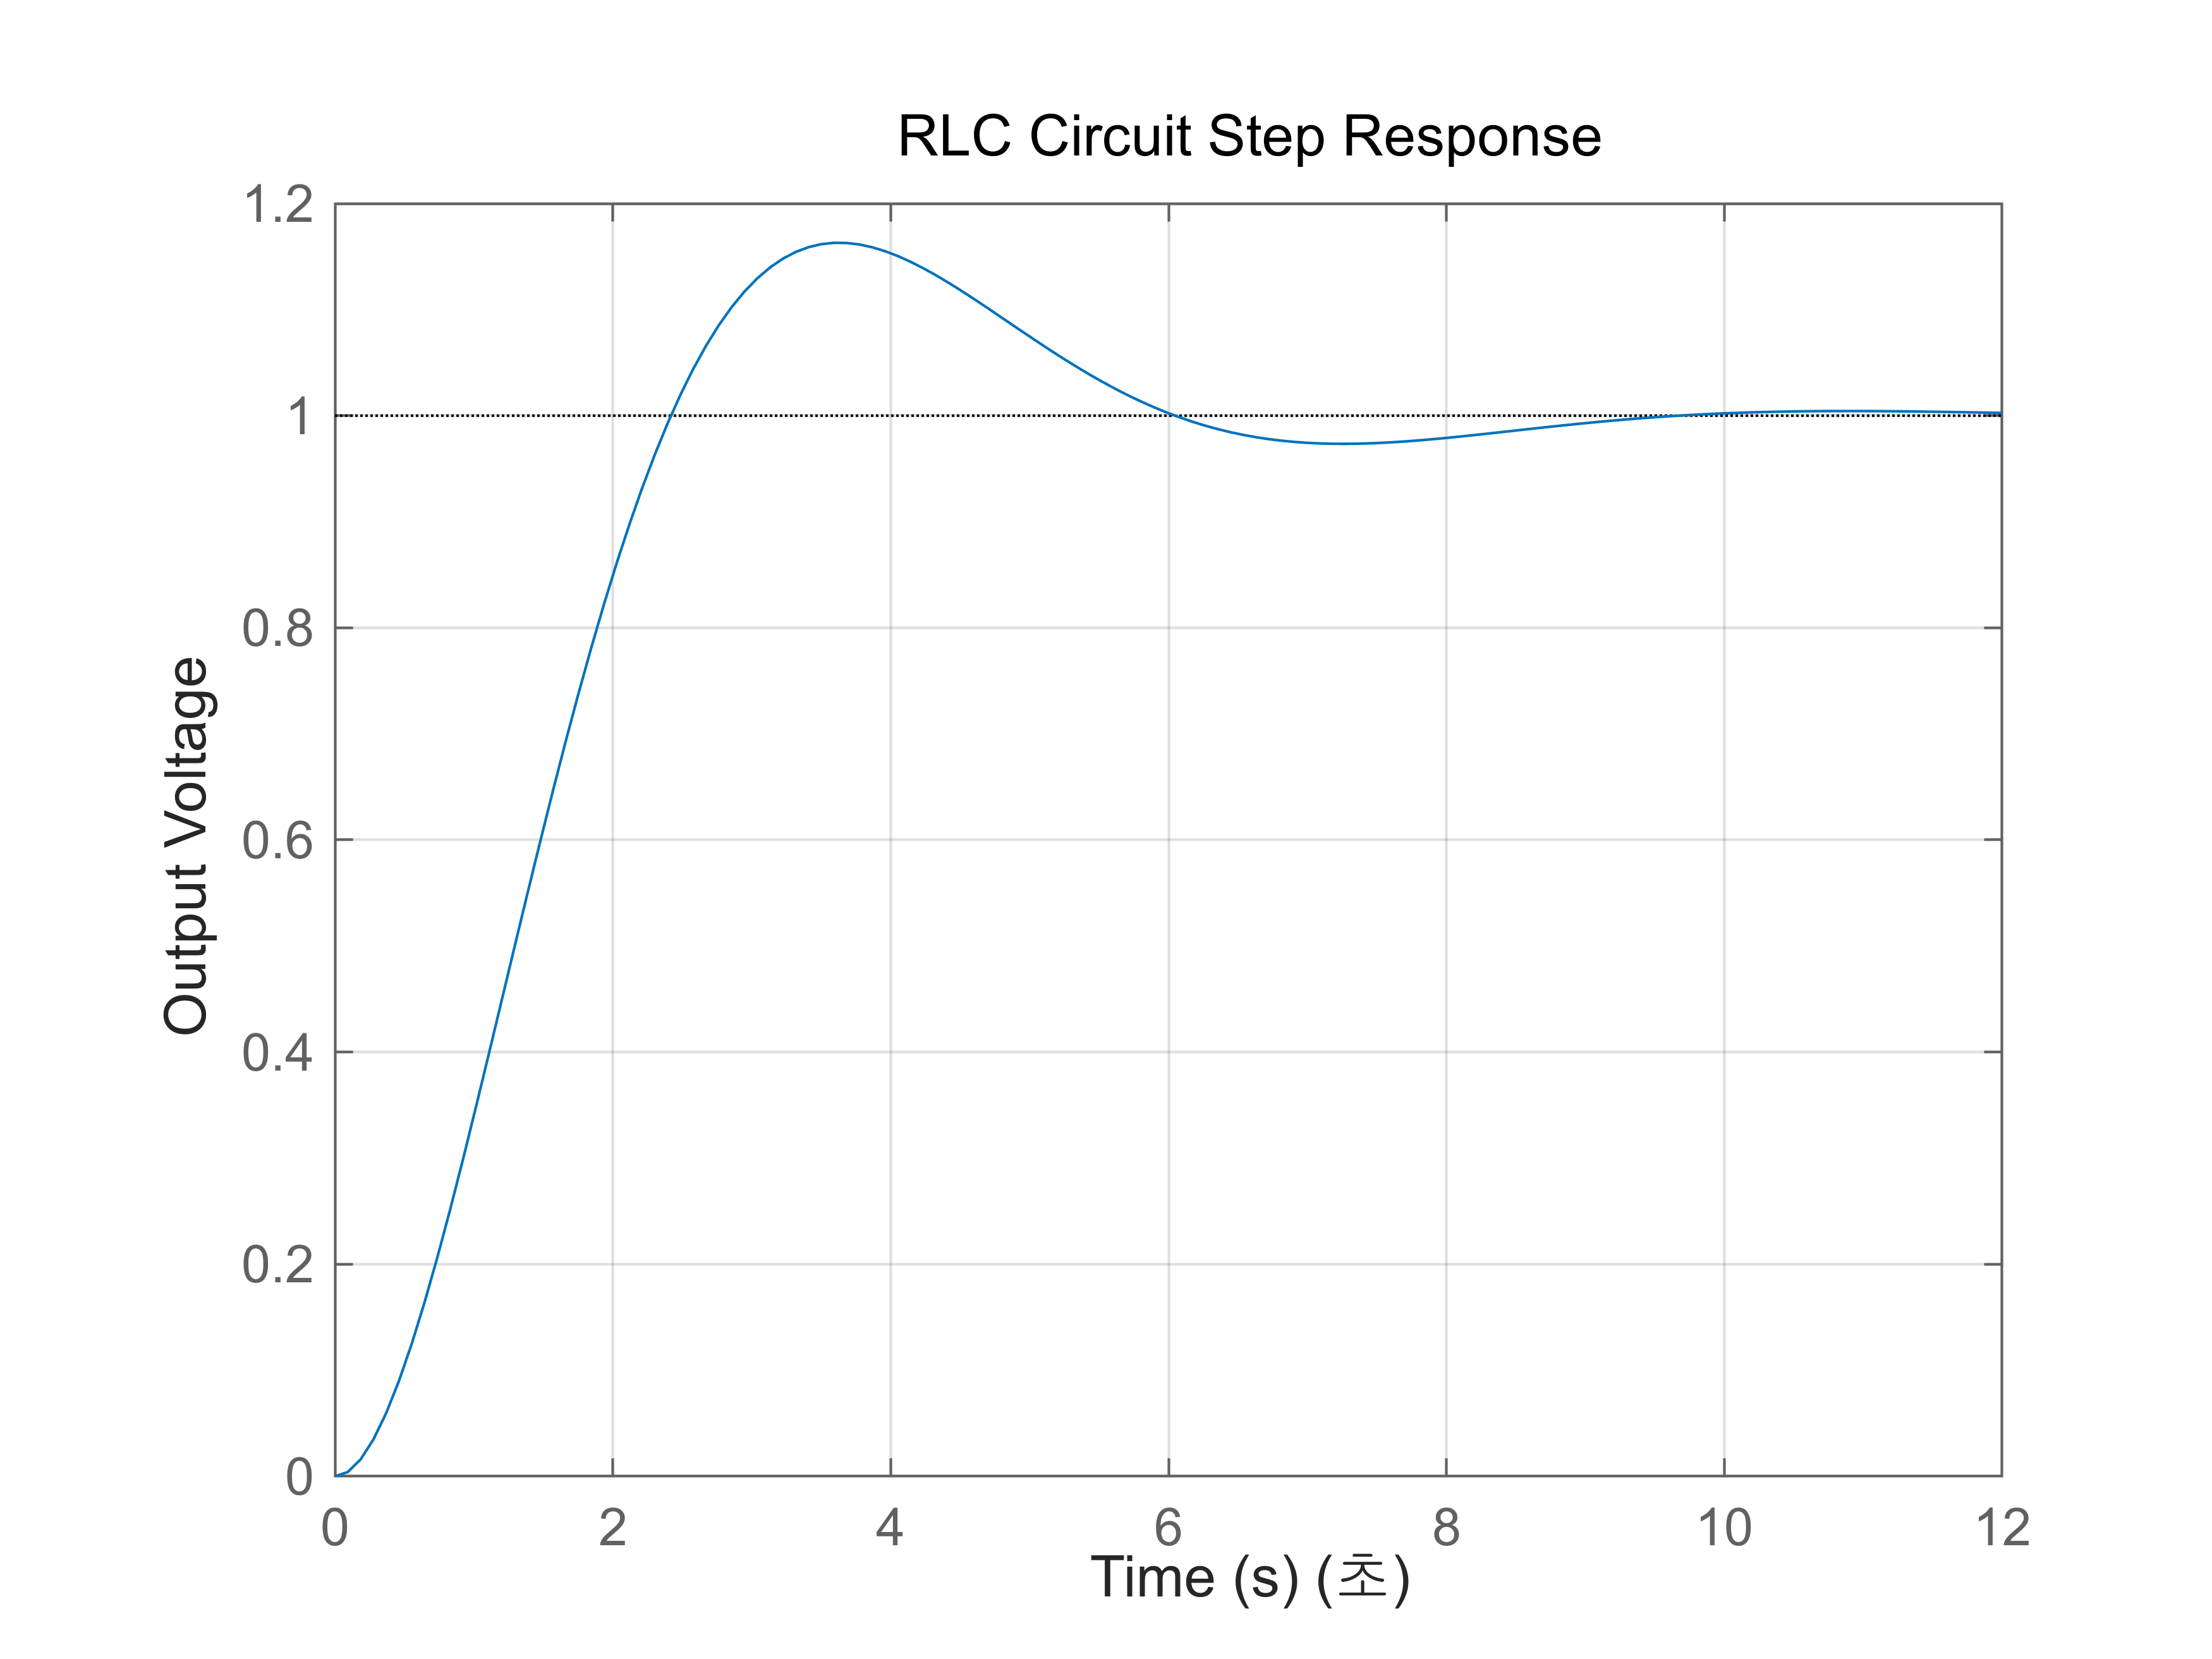

In [9]:
% RLC 회로의 전달함수 정의
L = 1;   % 인덕터 값
C = 1;   % 커패시터 값
R = 1;   % 저항 값

% 전달함수: G(s) = 1 / (LCs^2 + RCs + 1)
s = tf('s');
G = 1 / (L*C*s^2 + R*C*s + 1);

% 단위 계단 응답 계산
figure;
step(G);
title('RLC Circuit Step Response');
xlabel('Time (s)');
ylabel('Output Voltage');
grid on;


**낭비 시간 요소 (Dead Time Element)****:**

-  **낭비 시간 요소**는 시스템 입력에 대해 일정 시간이 경과한 후에 출력이 나타나는 시스템을 말합니다.
-  수학적으로는 다음과 같이 표현됩니다: $y(t)=x(t-\tau )$ 여기서 $\tau$ 는 시간 지연(낭비 시간)을 나타냅니다.
-  라플라스 변환으로는: $G(s)=e^{-\tau s}$ 로 나타낼 수 있습니다. 이는 시스템에 일정 시간 동안 입력이 전혀 영향을 미치지 않다가, 시간이 경과한 후에 영향을 미치기 시작하는 모델을 설명합니다.
-  **단위 계단 입력에 대한 낭비 시간 요소의 응답**:
-  그림에서 단위 계단 입력에 대해, 일정 시간 $\tau$ 동안 출력이 없고, 그 이후에 출력이 발생하는 것을 보여줍니다.

 **2.** **낭비 시간 요소의 예****:**

-  (a) **보일러 온도 조절 시스템**:
-  보일러에서 물을 가열하여 온도를 제어하는 과정에서, 가열된 물이 파이프를 통해 이동하는 데 시간이 걸립니다. 이 시간 지연을 낭비 시간으로 볼 수 있습니다.
-  전달함수는 다음과 같습니다: $G(s)=e^{-\tau s}$ 여기서 $\tau$ 는 물이 이동하는 데 걸리는 시간입니다.
-  (b) **컨베이어 벨트 운송 시스템**:
-  공장에서 물체가 컨베이어 벨트를 통해 이동할 때, 물체가 목적지에 도착하기까지 시간이 걸립니다. 이 시간 지연을 낭비 시간으로 볼 수 있습니다.
-  시스템의 전달함수는 다음과 같이 나타낼 수 있습니다: $G(s)=e^{-\frac{L}{v}s}$ 여기서 $L$ 은 거리를, $v$ 는 벨트의 속도를 나타냅니다. 물체가 이동하는 동안 시스템은 출력이 나타나지 않다가, 물체가 목적지에 도착했을 때 비로소 출력이 발생합니다.


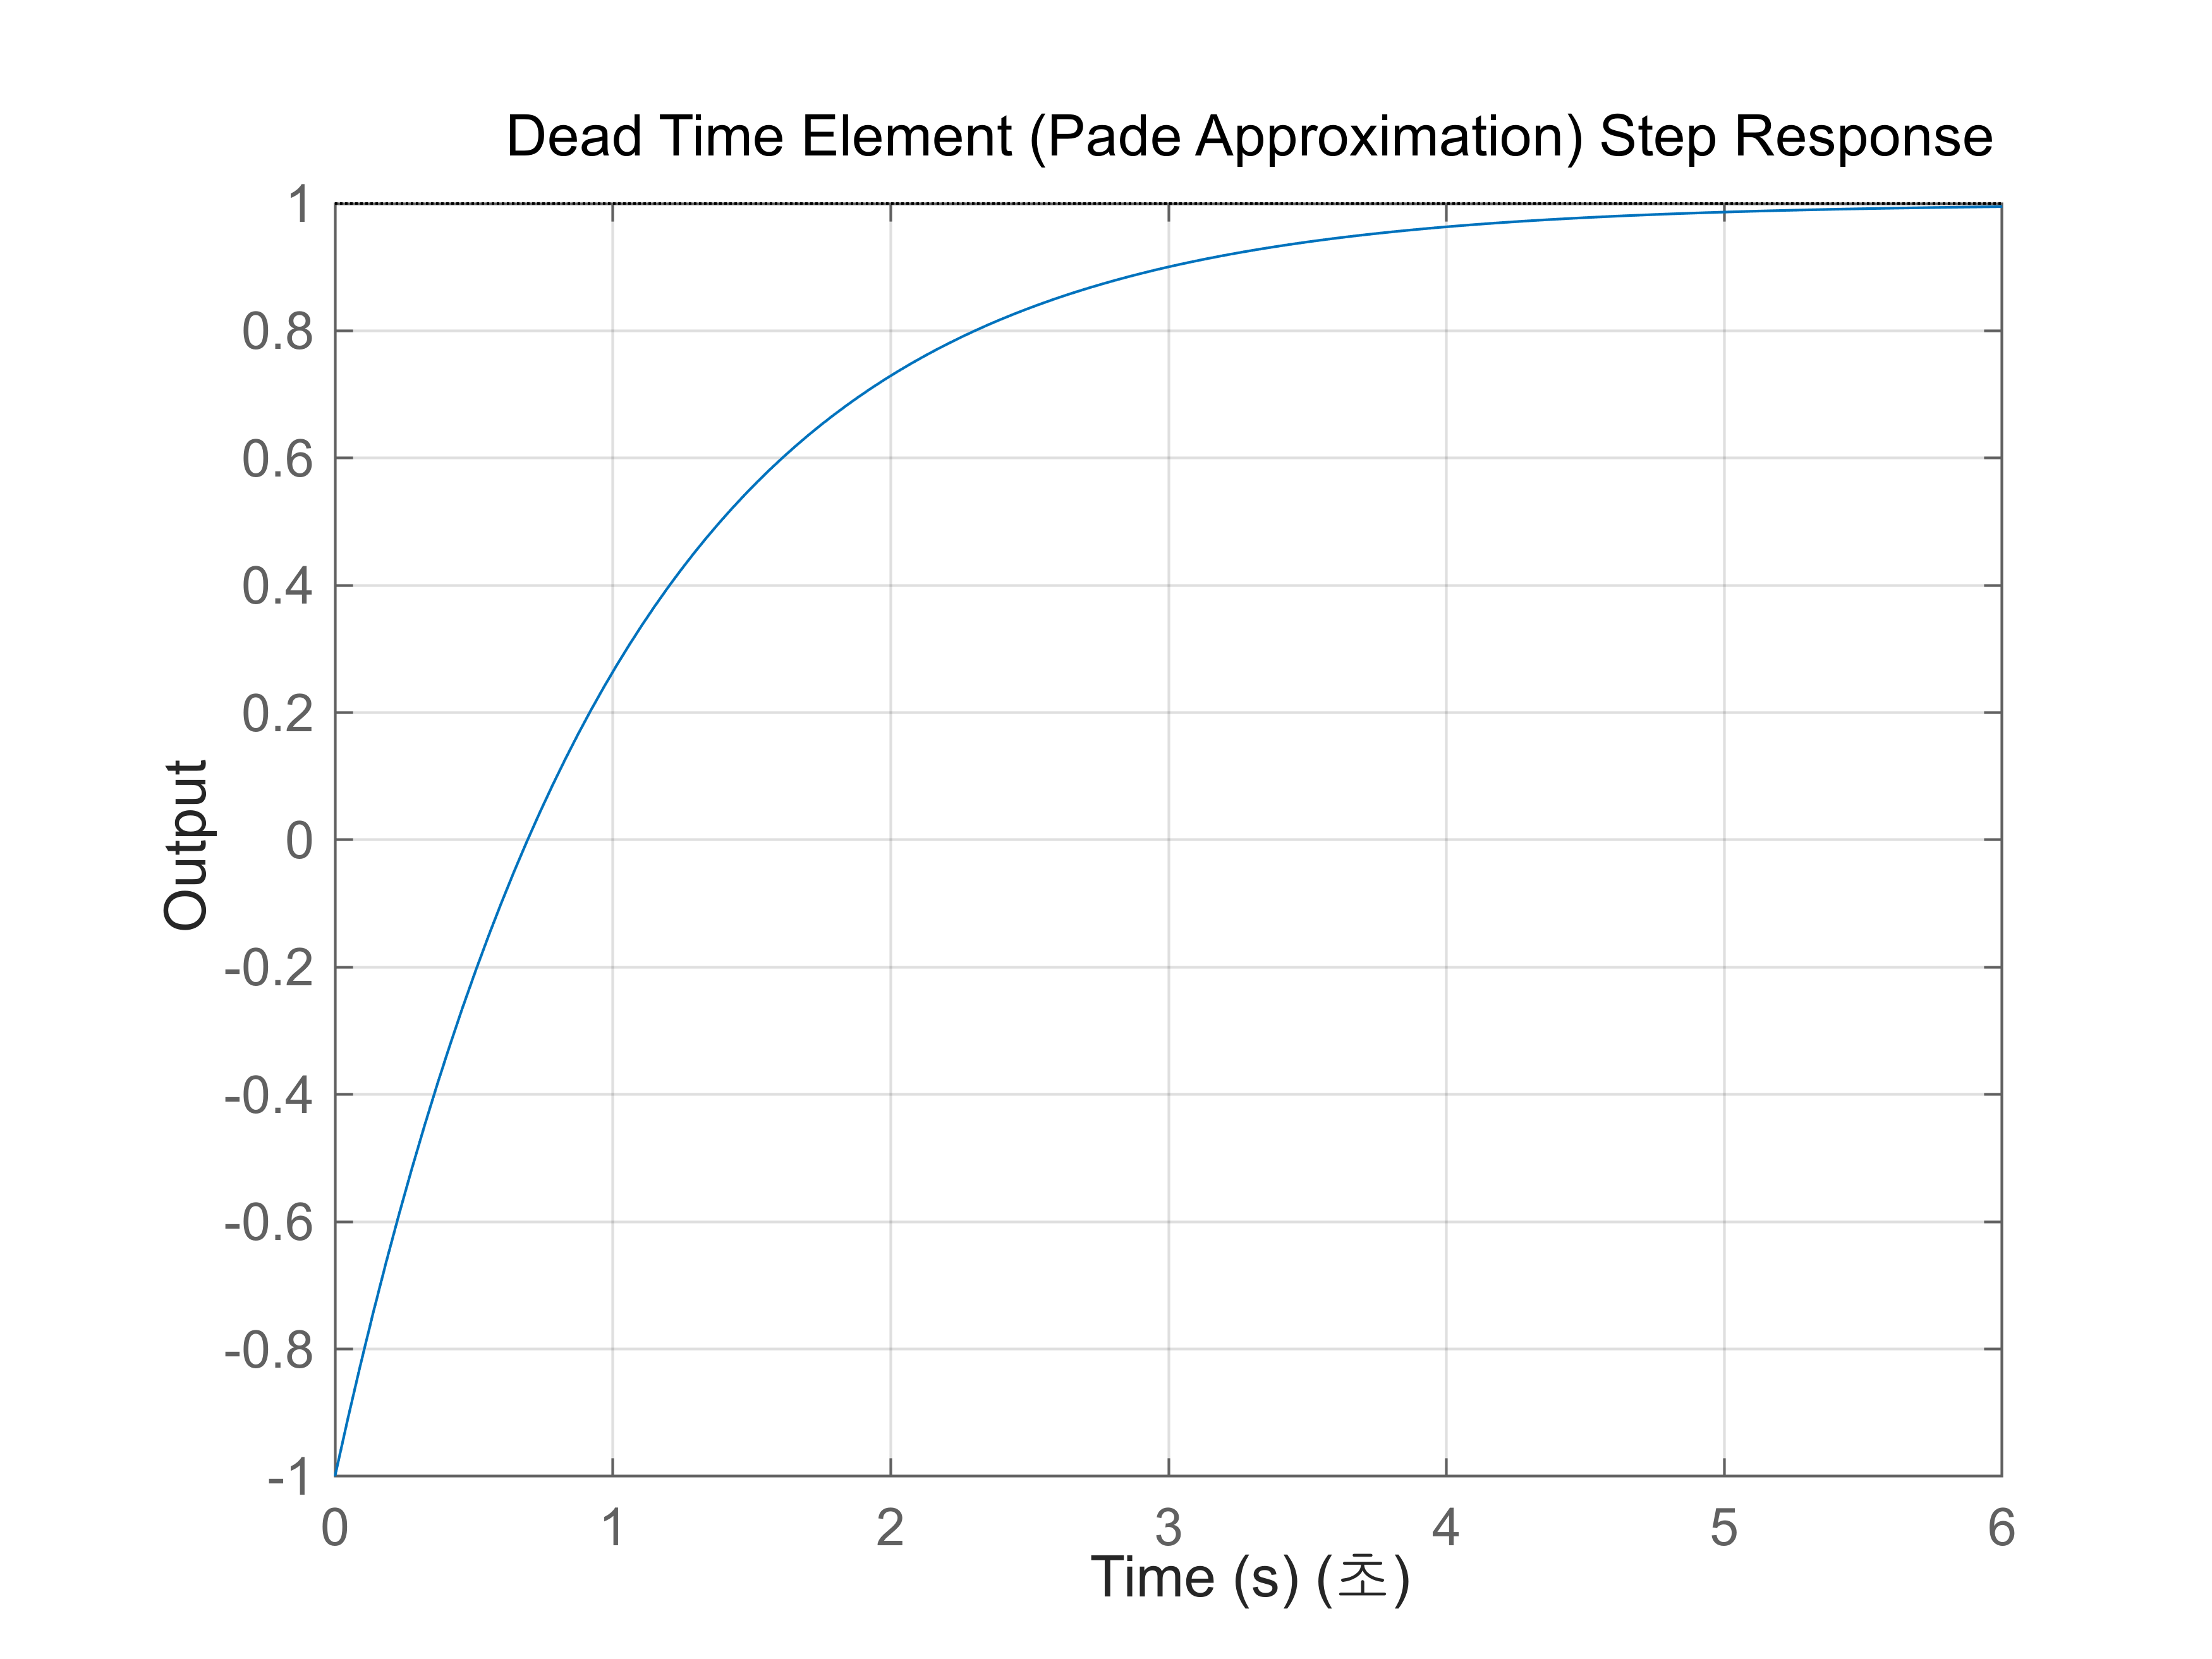

In [10]:
% 낭비 시간 요소 정의
tau = 2;  % 시간 지연 (dead time)

% Pade 근사법을 사용하여 전달함수 근사
[num, den] = pade(tau, 1);  % 1차 근사 사용
G = tf(num, den);

% 단위 계단 응답 계산
figure;
step(G);
title('Dead Time Element (Pade Approximation) Step Response');
xlabel('Time (s)');
ylabel('Output');
grid on;



!!!EndOutputRegion!!!